In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
# Import charging output file from SUMO
df_output = pd.read_csv('charging_output.csv', delimiter=";")
df_output

C:\Users\joey_\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,step,charging_station,status,EV,watt_charged,current_battery,max_battery
0,0,hh1_ev1_homecs,not charging,NaN,NaN,NaN,NaN
1,0,hh1_ev3_homecs,not charging,NaN,NaN,NaN,NaN
2,0,hh1_ev4_homecs,not charging,NaN,NaN,NaN,NaN
3,0,hh1_ev5_homecs,not charging,NaN,NaN,NaN,NaN
4,0,hh1_ev7_homecs,not charging,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
202850,86400,hh16_ev132_public,not charging,NaN,NaN,NaN,NaN
202851,86400,hh16_ev133_public,not charging,NaN,NaN,NaN,NaN
202852,86400,hh16_ev134_public,not charging,NaN,NaN,NaN,NaN
202853,86400,hh16_ev135_public,not charging,NaN,NaN,NaN,NaN


In [3]:
# Make copy
df = df_output

## Power profile of transformer 2 for comparison

In [5]:
# The same process as in profile_load
df_1 = df_output
df_1 = df_1[df_1['charging_station'] == "hh9_ev10_public"]
df_1 = df_1.drop(df_1.columns[[1, 3,4,5,6]], axis=1)
df_1['status'] = df_1['status'].str.replace('not charging','0')
df_1['status'] = df_1['status'].str.replace('charging','1')
df_1["status"] = pd.to_numeric(df_1["status"])
df_1['charging'] = df_1['status'] * 22
df_1 = df_1.drop(df_1.columns[[1]], axis=1)
df_1["step"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10","15:20","15:30","15:40","15:50","16:00","16:10","16:20","16:30","16:40","16:50","17:00","17:10","17:20","17:30","17:40","17:50","18:00","18:10","18:20","18:30","18:40","18:50","19:00","19:10","19:20","19:30","19:40","19:50","20:00","20:10","20:20","20:30","20:40","20:50","21:00","21:10","21:20","21:30","21:40","21:50","22:00","22:10","22:20","22:30","22:40","22:50","23:00","23:10","23:20","23:30","23:40","23:50","00:00","00:10","00:20","00:30","00:40","00:50","01:00","01:10","01:20","01:30","01:40","01:50","02:00","02:10","02:20","02:30","02:40","02:50","03:00","03:10","03:20","03:30","03:40","03:50","04:00","04:10","04:20","04:30","04:40","04:50","05:00","05:10","05:20","05:30","05:40","05:50","06:00"]
df_1

,step,charging
969,06:00,0
2368,06:10,0
3767,06:20,0
5166,06:30,0
6565,06:40,0
...,...,...
196829,05:20,0
198228,05:30,0
199627,05:40,0
201026,05:50,0


In [6]:
df_2 = df_output
df_2 = df_2[df_2['charging_station'] == "hh8_ev30_public"]
df_2 = df_2.drop(df_2.columns[[1, 3,4,5,6]], axis=1)
df_2['status'] = df_2['status'].str.replace('not charging','0')
df_2['status'] = df_2['status'].str.replace('charging','1')
df_2["status"] = pd.to_numeric(df_2["status"])
df_2['charging'] = df_2['status'] * 22
df_2["step"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10","15:20","15:30","15:40","15:50","16:00","16:10","16:20","16:30","16:40","16:50","17:00","17:10","17:20","17:30","17:40","17:50","18:00","18:10","18:20","18:30","18:40","18:50","19:00","19:10","19:20","19:30","19:40","19:50","20:00","20:10","20:20","20:30","20:40","20:50","21:00","21:10","21:20","21:30","21:40","21:50","22:00","22:10","22:20","22:30","22:40","22:50","23:00","23:10","23:20","23:30","23:40","23:50","00:00","00:10","00:20","00:30","00:40","00:50","01:00","01:10","01:20","01:30","01:40","01:50","02:00","02:10","02:20","02:30","02:40","02:50","03:00","03:10","03:20","03:30","03:40","03:50","04:00","04:10","04:20","04:30","04:40","04:50","05:00","05:10","05:20","05:30","05:40","05:50","06:00"]
df_2 = df_2.drop(df_2.columns[[1]], axis=1)

In [7]:
df_3 = df_output
df_3 = df_3[df_3['charging_station'] == "hh8_ev30_work"]
df_3 = df_3.drop(df_3.columns[[1, 3,4,5,6]], axis=1)
df_3['status'] = df_3['status'].str.replace('not charging','0')
df_3['status'] = df_3['status'].str.replace('charging','1')
df_3["status"] = pd.to_numeric(df_3["status"])
df_3['charging'] = df_3['status'] * 7
df_3["step"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10","15:20","15:30","15:40","15:50","16:00","16:10","16:20","16:30","16:40","16:50","17:00","17:10","17:20","17:30","17:40","17:50","18:00","18:10","18:20","18:30","18:40","18:50","19:00","19:10","19:20","19:30","19:40","19:50","20:00","20:10","20:20","20:30","20:40","20:50","21:00","21:10","21:20","21:30","21:40","21:50","22:00","22:10","22:20","22:30","22:40","22:50","23:00","23:10","23:20","23:30","23:40","23:50","00:00","00:10","00:20","00:30","00:40","00:50","01:00","01:10","01:20","01:30","01:40","01:50","02:00","02:10","02:20","02:30","02:40","02:50","03:00","03:10","03:20","03:30","03:40","03:50","04:00","04:10","04:20","04:30","04:40","04:50","05:00","05:10","05:20","05:30","05:40","05:50","06:00"]
df_3 = df_3.drop(df_3.columns[[1]], axis=1)

In [8]:
df_4 = df_output
df_4 = df_4[df_4['charging_station'] == "hh11_ev20_public"]
df_4 = df_4.drop(df_4.columns[[1, 3,4,5,6]], axis=1)
df_4['status'] = df_4['status'].str.replace('not charging','0')
df_4['status'] = df_4['status'].str.replace('charging','1')
df_4["status"] = pd.to_numeric(df_4["status"])
df_4['charging'] = df_4['status'] * 22
df_4["step"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10","15:20","15:30","15:40","15:50","16:00","16:10","16:20","16:30","16:40","16:50","17:00","17:10","17:20","17:30","17:40","17:50","18:00","18:10","18:20","18:30","18:40","18:50","19:00","19:10","19:20","19:30","19:40","19:50","20:00","20:10","20:20","20:30","20:40","20:50","21:00","21:10","21:20","21:30","21:40","21:50","22:00","22:10","22:20","22:30","22:40","22:50","23:00","23:10","23:20","23:30","23:40","23:50","00:00","00:10","00:20","00:30","00:40","00:50","01:00","01:10","01:20","01:30","01:40","01:50","02:00","02:10","02:20","02:30","02:40","02:50","03:00","03:10","03:20","03:30","03:40","03:50","04:00","04:10","04:20","04:30","04:40","04:50","05:00","05:10","05:20","05:30","05:40","05:50","06:00"]
df_4 = df_4.drop(df_4.columns[[1]], axis=1)

In [9]:
df_5 = df_output
df_5 = df_5[df_5['charging_station'] == "hh16_ev101_work"]
df_5 = df_5.drop(df_5.columns[[1, 3,4,5,6]], axis=1)
df_5['status'] = df_5['status'].str.replace('not charging','0')
df_5['status'] = df_5['status'].str.replace('charging','1')
df_5["status"] = pd.to_numeric(df_5["status"])
df_5['charging'] = df_5['status'] * 7
df_5["step"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10","15:20","15:30","15:40","15:50","16:00","16:10","16:20","16:30","16:40","16:50","17:00","17:10","17:20","17:30","17:40","17:50","18:00","18:10","18:20","18:30","18:40","18:50","19:00","19:10","19:20","19:30","19:40","19:50","20:00","20:10","20:20","20:30","20:40","20:50","21:00","21:10","21:20","21:30","21:40","21:50","22:00","22:10","22:20","22:30","22:40","22:50","23:00","23:10","23:20","23:30","23:40","23:50","00:00","00:10","00:20","00:30","00:40","00:50","01:00","01:10","01:20","01:30","01:40","01:50","02:00","02:10","02:20","02:30","02:40","02:50","03:00","03:10","03:20","03:30","03:40","03:50","04:00","04:10","04:20","04:30","04:40","04:50","05:00","05:10","05:20","05:30","05:40","05:50","06:00"]
df_5 = df_5.drop(df_5.columns[[1]], axis=1)

In [10]:
df_6 = df_output
df_6 = df_6[df_6['charging_station'] == "hh3_ev11_public"]
df_6 = df_6.drop(df_6.columns[[1, 3,4,5,6]], axis=1)
df_6['status'] = df_6['status'].str.replace('not charging','0')
df_6['status'] = df_6['status'].str.replace('charging','1')
df_6["status"] = pd.to_numeric(df_6["status"])
df_6['charging'] = df_6['status'] * 22
df_6["step"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10","15:20","15:30","15:40","15:50","16:00","16:10","16:20","16:30","16:40","16:50","17:00","17:10","17:20","17:30","17:40","17:50","18:00","18:10","18:20","18:30","18:40","18:50","19:00","19:10","19:20","19:30","19:40","19:50","20:00","20:10","20:20","20:30","20:40","20:50","21:00","21:10","21:20","21:30","21:40","21:50","22:00","22:10","22:20","22:30","22:40","22:50","23:00","23:10","23:20","23:30","23:40","23:50","00:00","00:10","00:20","00:30","00:40","00:50","01:00","01:10","01:20","01:30","01:40","01:50","02:00","02:10","02:20","02:30","02:40","02:50","03:00","03:10","03:20","03:30","03:40","03:50","04:00","04:10","04:20","04:30","04:40","04:50","05:00","05:10","05:20","05:30","05:40","05:50","06:00"]
df_6 = df_6.drop(df_6.columns[[1]], axis=1)

In [11]:
df_7 = df_output
df_7 = df_7[df_7['charging_station'] == "hh2_ev20_homecs"]
df_7 = df_7.drop(df_7.columns[[1, 3,4,5,6]], axis=1)
df_7['status'] = df_7['status'].str.replace('not charging','0')
df_7['status'] = df_7['status'].str.replace('charging','1')
df_7["status"] = pd.to_numeric(df_7["status"])
df_7['charging'] = df_7['status'] * 7
df_7["step"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10","15:20","15:30","15:40","15:50","16:00","16:10","16:20","16:30","16:40","16:50","17:00","17:10","17:20","17:30","17:40","17:50","18:00","18:10","18:20","18:30","18:40","18:50","19:00","19:10","19:20","19:30","19:40","19:50","20:00","20:10","20:20","20:30","20:40","20:50","21:00","21:10","21:20","21:30","21:40","21:50","22:00","22:10","22:20","22:30","22:40","22:50","23:00","23:10","23:20","23:30","23:40","23:50","00:00","00:10","00:20","00:30","00:40","00:50","01:00","01:10","01:20","01:30","01:40","01:50","02:00","02:10","02:20","02:30","02:40","02:50","03:00","03:10","03:20","03:30","03:40","03:50","04:00","04:10","04:20","04:30","04:40","04:50","05:00","05:10","05:20","05:30","05:40","05:50","06:00"]
df_7 = df_7.drop(df_7.columns[[1]], axis=1)

In [12]:
df_8 = df_output
df_8 = df_8[df_8['charging_station'] == "hh15_ev2_public"]
df_8 = df_8.drop(df_8.columns[[1, 3,4,5,6]], axis=1)
df_8['status'] = df_8['status'].str.replace('not charging','0')
df_8['status'] = df_8['status'].str.replace('charging','1')
df_8["status"] = pd.to_numeric(df_8["status"])
df_8['charging'] = df_8['status'] * 22
df_8["step"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10","15:20","15:30","15:40","15:50","16:00","16:10","16:20","16:30","16:40","16:50","17:00","17:10","17:20","17:30","17:40","17:50","18:00","18:10","18:20","18:30","18:40","18:50","19:00","19:10","19:20","19:30","19:40","19:50","20:00","20:10","20:20","20:30","20:40","20:50","21:00","21:10","21:20","21:30","21:40","21:50","22:00","22:10","22:20","22:30","22:40","22:50","23:00","23:10","23:20","23:30","23:40","23:50","00:00","00:10","00:20","00:30","00:40","00:50","01:00","01:10","01:20","01:30","01:40","01:50","02:00","02:10","02:20","02:30","02:40","02:50","03:00","03:10","03:20","03:30","03:40","03:50","04:00","04:10","04:20","04:30","04:40","04:50","05:00","05:10","05:20","05:30","05:40","05:50","06:00"]
df_8 = df_8.drop(df_8.columns[[1]], axis=1)

In [13]:
df_9 = df_output
df_9 = df_9[df_9['charging_station'] == "hh2_ev20_public"]
df_9 = df_9.drop(df_9.columns[[1, 3,4,5,6]], axis=1)
df_9['status'] = df_9['status'].str.replace('not charging','0')
df_9['status'] = df_9['status'].str.replace('charging','1')
df_9["status"] = pd.to_numeric(df_9["status"])
df_9['charging'] = df_9['status'] * 22
df_9["step"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10","15:20","15:30","15:40","15:50","16:00","16:10","16:20","16:30","16:40","16:50","17:00","17:10","17:20","17:30","17:40","17:50","18:00","18:10","18:20","18:30","18:40","18:50","19:00","19:10","19:20","19:30","19:40","19:50","20:00","20:10","20:20","20:30","20:40","20:50","21:00","21:10","21:20","21:30","21:40","21:50","22:00","22:10","22:20","22:30","22:40","22:50","23:00","23:10","23:20","23:30","23:40","23:50","00:00","00:10","00:20","00:30","00:40","00:50","01:00","01:10","01:20","01:30","01:40","01:50","02:00","02:10","02:20","02:30","02:40","02:50","03:00","03:10","03:20","03:30","03:40","03:50","04:00","04:10","04:20","04:30","04:40","04:50","05:00","05:10","05:20","05:30","05:40","05:50","06:00"]
df_9 = df_9.drop(df_9.columns[[1]], axis=1)

In [14]:
df_10 = df_output
df_10 = df_10[df_10['charging_station'] == "hh3_ev60_public"]
df_10 = df_10.drop(df_10.columns[[1, 3,4,5,6]], axis=1)
df_10['status'] = df_10['status'].str.replace('not charging','0')
df_10['status'] = df_10['status'].str.replace('charging','1')
df_10["status"] = pd.to_numeric(df_10["status"])
df_10['charging'] = df_10['status'] * 22
df_10["step"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10","15:20","15:30","15:40","15:50","16:00","16:10","16:20","16:30","16:40","16:50","17:00","17:10","17:20","17:30","17:40","17:50","18:00","18:10","18:20","18:30","18:40","18:50","19:00","19:10","19:20","19:30","19:40","19:50","20:00","20:10","20:20","20:30","20:40","20:50","21:00","21:10","21:20","21:30","21:40","21:50","22:00","22:10","22:20","22:30","22:40","22:50","23:00","23:10","23:20","23:30","23:40","23:50","00:00","00:10","00:20","00:30","00:40","00:50","01:00","01:10","01:20","01:30","01:40","01:50","02:00","02:10","02:20","02:30","02:40","02:50","03:00","03:10","03:20","03:30","03:40","03:50","04:00","04:10","04:20","04:30","04:40","04:50","05:00","05:10","05:20","05:30","05:40","05:50","06:00"]
df_10 = df_10.drop(df_10.columns[[1]], axis=1)

In [15]:
df_11 = df_output
df_11 = df_11[df_11['charging_station'] == "hh1_ev10_public"]
df_11 = df_11.drop(df_11.columns[[1, 3,4,5,6]], axis=1)
df_11['status'] = df_11['status'].str.replace('not charging','0')
df_11['status'] = df_11['status'].str.replace('charging','1')
df_11["status"] = pd.to_numeric(df_11["status"])
df_11['charging'] = df_11['status'] * 22
df_11["step"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10","15:20","15:30","15:40","15:50","16:00","16:10","16:20","16:30","16:40","16:50","17:00","17:10","17:20","17:30","17:40","17:50","18:00","18:10","18:20","18:30","18:40","18:50","19:00","19:10","19:20","19:30","19:40","19:50","20:00","20:10","20:20","20:30","20:40","20:50","21:00","21:10","21:20","21:30","21:40","21:50","22:00","22:10","22:20","22:30","22:40","22:50","23:00","23:10","23:20","23:30","23:40","23:50","00:00","00:10","00:20","00:30","00:40","00:50","01:00","01:10","01:20","01:30","01:40","01:50","02:00","02:10","02:20","02:30","02:40","02:50","03:00","03:10","03:20","03:30","03:40","03:50","04:00","04:10","04:20","04:30","04:40","04:50","05:00","05:10","05:20","05:30","05:40","05:50","06:00"]
df_11 = df_11.drop(df_11.columns[[1]], axis=1)

In [16]:
df_12 = df_output
df_12 = df_12[df_12['charging_station'] == "hh16_ev119_public"]
df_12 = df_12.drop(df_12.columns[[1, 3,4,5,6]], axis=1)
df_12['status'] = df_12['status'].str.replace('not charging','0')
df_12['status'] = df_12['status'].str.replace('charging','1')
df_12["status"] = pd.to_numeric(df_12["status"])
df_12['charging'] = df_12['status'] * 22
df_12["step"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10","15:20","15:30","15:40","15:50","16:00","16:10","16:20","16:30","16:40","16:50","17:00","17:10","17:20","17:30","17:40","17:50","18:00","18:10","18:20","18:30","18:40","18:50","19:00","19:10","19:20","19:30","19:40","19:50","20:00","20:10","20:20","20:30","20:40","20:50","21:00","21:10","21:20","21:30","21:40","21:50","22:00","22:10","22:20","22:30","22:40","22:50","23:00","23:10","23:20","23:30","23:40","23:50","00:00","00:10","00:20","00:30","00:40","00:50","01:00","01:10","01:20","01:30","01:40","01:50","02:00","02:10","02:20","02:30","02:40","02:50","03:00","03:10","03:20","03:30","03:40","03:50","04:00","04:10","04:20","04:30","04:40","04:50","05:00","05:10","05:20","05:30","05:40","05:50","06:00"]
df_12 = df_12.drop(df_12.columns[[1]], axis=1)

In [17]:
df_13 = df_output
df_13 = df_13[df_13['charging_station'] == "hh1_ev16_homecs"]
df_13 = df_13.drop(df_13.columns[[1, 3,4,5,6]], axis=1)
df_13['status'] = df_13['status'].str.replace('not charging','0')
df_13['status'] = df_13['status'].str.replace('charging','1')
df_13["status"] = pd.to_numeric(df_13["status"])
df_13['charging'] = df_13['status'] * 7
df_13["step"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10","15:20","15:30","15:40","15:50","16:00","16:10","16:20","16:30","16:40","16:50","17:00","17:10","17:20","17:30","17:40","17:50","18:00","18:10","18:20","18:30","18:40","18:50","19:00","19:10","19:20","19:30","19:40","19:50","20:00","20:10","20:20","20:30","20:40","20:50","21:00","21:10","21:20","21:30","21:40","21:50","22:00","22:10","22:20","22:30","22:40","22:50","23:00","23:10","23:20","23:30","23:40","23:50","00:00","00:10","00:20","00:30","00:40","00:50","01:00","01:10","01:20","01:30","01:40","01:50","02:00","02:10","02:20","02:30","02:40","02:50","03:00","03:10","03:20","03:30","03:40","03:50","04:00","04:10","04:20","04:30","04:40","04:50","05:00","05:10","05:20","05:30","05:40","05:50","06:00"]
df_13 = df_13.drop(df_13.columns[[1]], axis=1)

In [18]:
# Combine power profiles of charging stations into transfomer 2
df_all2 = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11, df_12, df_13]) 
df_all2 = df_all2.sort_values('step')
df_all2 = df_all2.groupby('step').sum()
df_all2

,charging
step,
00:00,0.0
00:10,0.0
00:20,0.0
00:30,0.0
00:40,0.0
...,...
23:10,0.0
23:20,0.0
23:30,0.0


In [45]:
# Rename column
df_all2['baseline_scenario'] = df_all2['charging']
df_all2

,charging,baseline_scenario
step,,
00:00,0.0,0.0
00:10,0.0,0.0
00:20,0.0,0.0
00:30,0.0,0.0
00:40,0.0,0.0
...,...,...
23:10,0.0,0.0
23:20,0.0,0.0
23:30,0.0,0.0


In [46]:
# Drop irrelevant column
df_all2 = df_all2.drop(df_all2.columns[[0]], axis=1)
df_all2

,baseline_scenario
step,
00:00,0.0
00:10,0.0
00:20,0.0
00:30,0.0
00:40,0.0
...,...
23:10,0.0
23:20,0.0
23:30,0.0


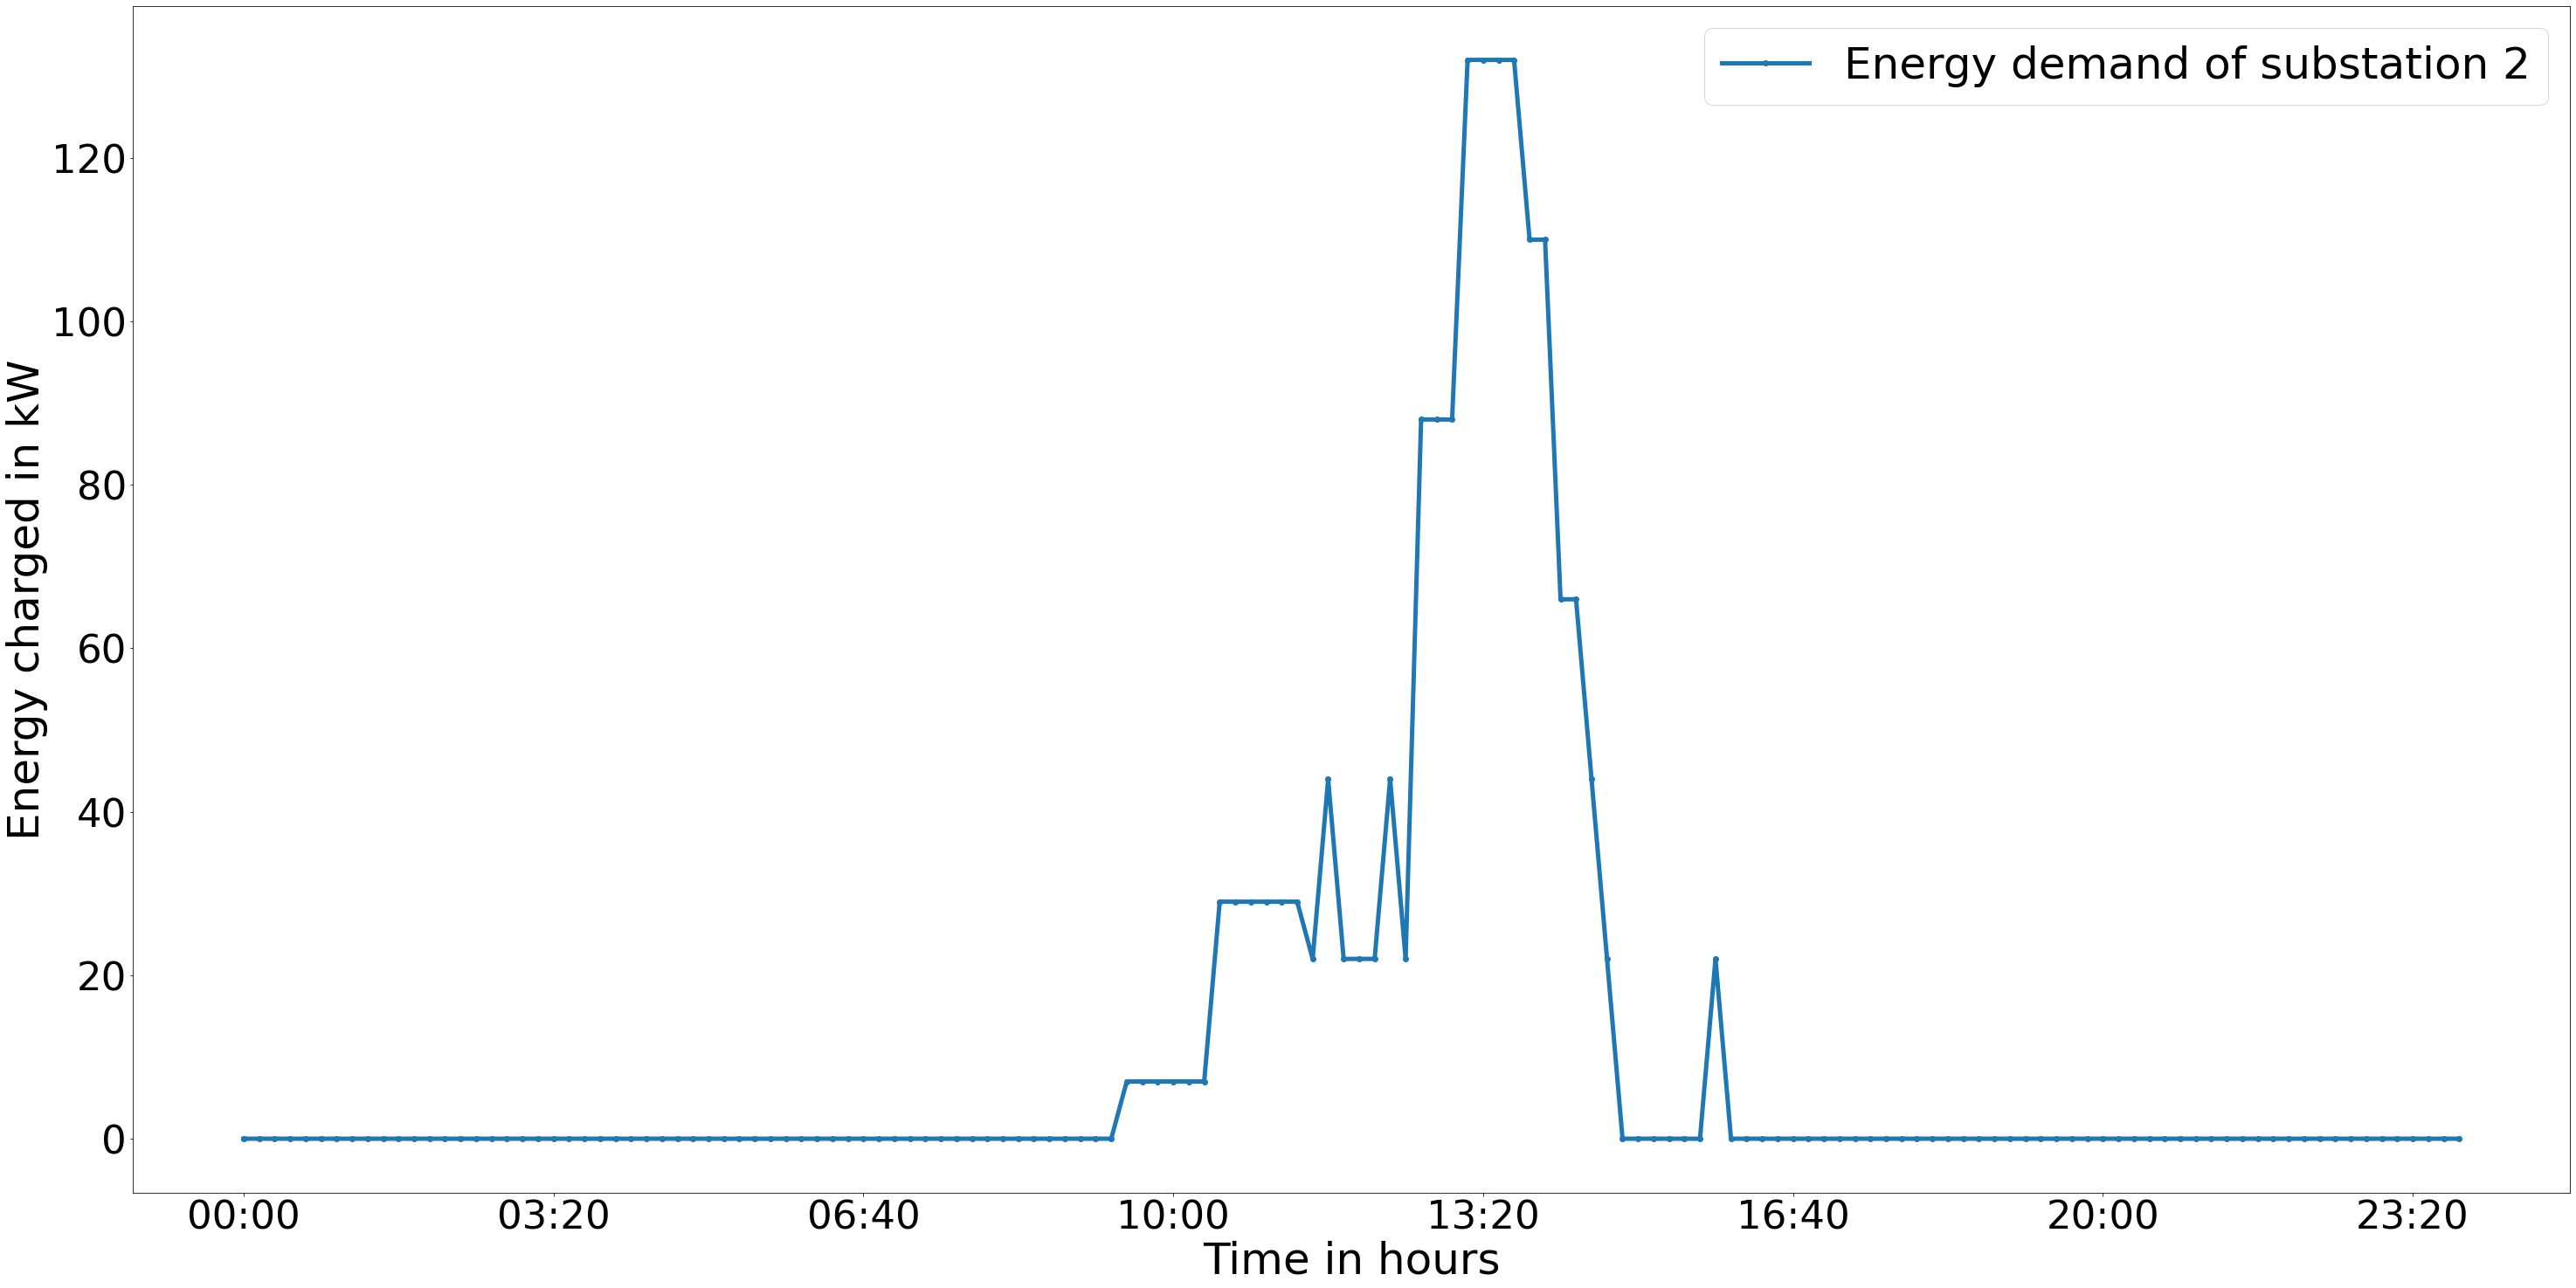

In [19]:
# Plot power profile of transformer 2
df_all2.plot(y='charging', kind = 'line', lw = 5, figsize=(50,25), fontsize=45, style='o-')
plt.legend(['Energy demand of transformer 2'], fontsize=50)
plt.xlabel('Time in hours', fontsize=50)
plt.ylabel('Energy charged in kW', fontsize=50)
plt.show()

## Scenario 1 power profiles of transformer 2 

In [29]:
df_output = pd.read_csv('charging_scenario1.csv', delimiter=";")
df_output

,step,charging_station,status,EV,watt_charged,current_battery,maximum_battery
0,0,hh1_ev1_homecs,not charging,NaN,NaN,NaN,NaN
1,0,hh1_ev3_homecs,not charging,NaN,NaN,NaN,NaN
2,0,hh1_ev4_homecs,not charging,NaN,NaN,NaN,NaN
3,0,hh1_ev5_homecs,not charging,NaN,NaN,NaN,NaN
4,0,hh1_ev7_homecs,not charging,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
192420,86400,hh16_ev132_public,not charging,NaN,NaN,NaN,NaN
192421,86400,hh16_ev133_public,not charging,NaN,NaN,NaN,NaN
192422,86400,hh16_ev134_public,not charging,NaN,NaN,NaN,NaN
192423,86400,hh16_ev135_public,not charging,NaN,NaN,NaN,NaN


In [30]:
df_1 = df_output
df_1 = df_1[df_1['charging_station'] == "hh9_ev10_public"]
df_1 = df_1.drop(df_1.columns[[1, 3,4,5,6]], axis=1)
df_1['status'] = df_1['status'].str.replace('not charging','0')
df_1['status'] = df_1['status'].str.replace('charging','1')
df_1["status"] = pd.to_numeric(df_1["status"])
df_1['charging'] = df_1['status'] * 22
df_1 = df_1.drop(df_1.columns[[1]], axis=1)
df_1["step"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10","15:20","15:30","15:40","15:50","16:00","16:10","16:20","16:30","16:40","16:50","17:00","17:10","17:20","17:30","17:40","17:50","18:00","18:10","18:20","18:30","18:40","18:50","19:00","19:10","19:20","19:30","19:40","19:50","20:00","20:10","20:20","20:30","20:40","20:50","21:00","21:10","21:20","21:30","21:40","21:50","22:00","22:10","22:20","22:30","22:40","22:50","23:00","23:10","23:20","23:30","23:40","23:50","00:00","00:10","00:20","00:30","00:40","00:50","01:00","01:10","01:20","01:30","01:40","01:50","02:00","02:10","02:20","02:30","02:40","02:50","03:00","03:10","03:20","03:30","03:40","03:50","04:00","04:10","04:20","04:30","04:40","04:50","05:00","05:10","05:20","05:30","05:40","05:50","06:00"]
df_1

,step,charging
969,06:00,0
2368,06:10,0
3767,06:20,0
5166,06:30,0
6565,06:40,0
...,...,...
186403,05:20,0
187801,05:30,0
189199,05:40,0
190597,05:50,0


In [31]:
df_2 = df_output
df_2 = df_2[df_2['charging_station'] == "hh8_ev30_public"]
df_2 = df_2.drop(df_2.columns[[1, 3,4,5,6]], axis=1)
df_2['status'] = df_2['status'].str.replace('not charging','0')
df_2['status'] = df_2['status'].str.replace('charging','1')
df_2["status"] = pd.to_numeric(df_2["status"])
df_2['charging'] = df_2['status'] * 22
df_2["step"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10","15:20","15:30","15:40","15:50","16:00","16:10","16:20","16:30","16:40","16:50","17:00","17:10","17:20","17:30","17:40","17:50","18:00","18:10","18:20","18:30","18:40","18:50","19:00","19:10","19:20","19:30","19:40","19:50","20:00","20:10","20:20","20:30","20:40","20:50","21:00","21:10","21:20","21:30","21:40","21:50","22:00","22:10","22:20","22:30","22:40","22:50","23:00","23:10","23:20","23:30","23:40","23:50","00:00","00:10","00:20","00:30","00:40","00:50","01:00","01:10","01:20","01:30","01:40","01:50","02:00","02:10","02:20","02:30","02:40","02:50","03:00","03:10","03:20","03:30","03:40","03:50","04:00","04:10","04:20","04:30","04:40","04:50","05:00","05:10","05:20","05:30","05:40","05:50","06:00"]
df_2 = df_2.drop(df_2.columns[[1]], axis=1)

In [32]:
df_3 = df_output
df_3 = df_3[df_3['charging_station'] == "hh8_ev30_work"]
df_3 = df_3.drop(df_3.columns[[1, 3,4,5,6]], axis=1)
df_3['status'] = df_3['status'].str.replace('not charging','0')
df_3['status'] = df_3['status'].str.replace('charging','1')
df_3["status"] = pd.to_numeric(df_3["status"])
df_3['charging'] = df_3['status'] * 7
df_3["step"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10","15:20","15:30","15:40","15:50","16:00","16:10","16:20","16:30","16:40","16:50","17:00","17:10","17:20","17:30","17:40","17:50","18:00","18:10","18:20","18:30","18:40","18:50","19:00","19:10","19:20","19:30","19:40","19:50","20:00","20:10","20:20","20:30","20:40","20:50","21:00","21:10","21:20","21:30","21:40","21:50","22:00","22:10","22:20","22:30","22:40","22:50","23:00","23:10","23:20","23:30","23:40","23:50","00:00","00:10","00:20","00:30","00:40","00:50","01:00","01:10","01:20","01:30","01:40","01:50","02:00","02:10","02:20","02:30","02:40","02:50","03:00","03:10","03:20","03:30","03:40","03:50","04:00","04:10","04:20","04:30","04:40","04:50","05:00","05:10","05:20","05:30","05:40","05:50","06:00"]
df_3 = df_3.drop(df_3.columns[[1]], axis=1)

In [33]:
# Error means no charging steps for this charging station
df_4 = df_output
df_4 = df_4[df_4['charging_station'] == "hh11_ev20_public"]
df_4 = df_4.drop(df_4.columns[[1, 3,4,5,6]], axis=1)
df_4['status'] = df_4['status'].str.replace('not charging','0')
df_4['status'] = df_4['status'].str.replace('charging','1')
df_4["status"] = pd.to_numeric(df_4["status"])
df_4['charging'] = df_4['status'] * 22
df_4["step"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10","15:20","15:30","15:40","15:50","16:00","16:10","16:20","16:30","16:40","16:50","17:00","17:10","17:20","17:30","17:40","17:50","18:00","18:10","18:20","18:30","18:40","18:50","19:00","19:10","19:20","19:30","19:40","19:50","20:00","20:10","20:20","20:30","20:40","20:50","21:00","21:10","21:20","21:30","21:40","21:50","22:00","22:10","22:20","22:30","22:40","22:50","23:00","23:10","23:20","23:30","23:40","23:50","00:00","00:10","00:20","00:30","00:40","00:50","01:00","01:10","01:20","01:30","01:40","01:50","02:00","02:10","02:20","02:30","02:40","02:50","03:00","03:10","03:20","03:30","03:40","03:50","04:00","04:10","04:20","04:30","04:40","04:50","05:00","05:10","05:20","05:30","05:40","05:50","06:00"]
df_4 = df_4.drop(df_4.columns[[1]], axis=1)

ValueError: Length of values does not match length of index

In [34]:
df_5 = df_output
df_5 = df_5[df_5['charging_station'] == "hh16_ev101_work"]
df_5 = df_5.drop(df_5.columns[[1, 3,4,5,6]], axis=1)
df_5['status'] = df_5['status'].str.replace('not charging','0')
df_5['status'] = df_5['status'].str.replace('charging','1')
df_5["status"] = pd.to_numeric(df_5["status"])
df_5['charging'] = df_5['status'] * 7
df_5["step"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10","15:20","15:30","15:40","15:50","16:00","16:10","16:20","16:30","16:40","16:50","17:00","17:10","17:20","17:30","17:40","17:50","18:00","18:10","18:20","18:30","18:40","18:50","19:00","19:10","19:20","19:30","19:40","19:50","20:00","20:10","20:20","20:30","20:40","20:50","21:00","21:10","21:20","21:30","21:40","21:50","22:00","22:10","22:20","22:30","22:40","22:50","23:00","23:10","23:20","23:30","23:40","23:50","00:00","00:10","00:20","00:30","00:40","00:50","01:00","01:10","01:20","01:30","01:40","01:50","02:00","02:10","02:20","02:30","02:40","02:50","03:00","03:10","03:20","03:30","03:40","03:50","04:00","04:10","04:20","04:30","04:40","04:50","05:00","05:10","05:20","05:30","05:40","05:50","06:00"]
df_5 = df_5.drop(df_5.columns[[1]], axis=1)

In [35]:
df_6 = df_output
df_6 = df_6[df_6['charging_station'] == "hh3_ev11_public"]
df_6 = df_6.drop(df_6.columns[[1, 3,4,5,6]], axis=1)
df_6['status'] = df_6['status'].str.replace('not charging','0')
df_6['status'] = df_6['status'].str.replace('charging','1')
df_6["status"] = pd.to_numeric(df_6["status"])
df_6['charging'] = df_6['status'] * 22
df_6["step"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10","15:20","15:30","15:40","15:50","16:00","16:10","16:20","16:30","16:40","16:50","17:00","17:10","17:20","17:30","17:40","17:50","18:00","18:10","18:20","18:30","18:40","18:50","19:00","19:10","19:20","19:30","19:40","19:50","20:00","20:10","20:20","20:30","20:40","20:50","21:00","21:10","21:20","21:30","21:40","21:50","22:00","22:10","22:20","22:30","22:40","22:50","23:00","23:10","23:20","23:30","23:40","23:50","00:00","00:10","00:20","00:30","00:40","00:50","01:00","01:10","01:20","01:30","01:40","01:50","02:00","02:10","02:20","02:30","02:40","02:50","03:00","03:10","03:20","03:30","03:40","03:50","04:00","04:10","04:20","04:30","04:40","04:50","05:00","05:10","05:20","05:30","05:40","05:50","06:00"]
df_6 = df_6.drop(df_6.columns[[1]], axis=1)

In [36]:
df_7 = df_output
df_7 = df_7[df_7['charging_station'] == "hh2_ev20_homecs"]
df_7 = df_7.drop(df_7.columns[[1, 3,4,5,6]], axis=1)
df_7['status'] = df_7['status'].str.replace('not charging','0')
df_7['status'] = df_7['status'].str.replace('charging','1')
df_7["status"] = pd.to_numeric(df_7["status"])
df_7['charging'] = df_7['status'] * 7
df_7["step"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10","15:20","15:30","15:40","15:50","16:00","16:10","16:20","16:30","16:40","16:50","17:00","17:10","17:20","17:30","17:40","17:50","18:00","18:10","18:20","18:30","18:40","18:50","19:00","19:10","19:20","19:30","19:40","19:50","20:00","20:10","20:20","20:30","20:40","20:50","21:00","21:10","21:20","21:30","21:40","21:50","22:00","22:10","22:20","22:30","22:40","22:50","23:00","23:10","23:20","23:30","23:40","23:50","00:00","00:10","00:20","00:30","00:40","00:50","01:00","01:10","01:20","01:30","01:40","01:50","02:00","02:10","02:20","02:30","02:40","02:50","03:00","03:10","03:20","03:30","03:40","03:50","04:00","04:10","04:20","04:30","04:40","04:50","05:00","05:10","05:20","05:30","05:40","05:50","06:00"]
df_7 = df_7.drop(df_7.columns[[1]], axis=1)

In [37]:
df_8 = df_output
df_8 = df_8[df_8['charging_station'] == "hh15_ev2_public"]
df_8 = df_8.drop(df_8.columns[[1, 3,4,5,6]], axis=1)
df_8['status'] = df_8['status'].str.replace('not charging','0')
df_8['status'] = df_8['status'].str.replace('charging','1')
df_8["status"] = pd.to_numeric(df_8["status"])
df_8['charging'] = df_8['status'] * 22
df_8["step"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10","15:20","15:30","15:40","15:50","16:00","16:10","16:20","16:30","16:40","16:50","17:00","17:10","17:20","17:30","17:40","17:50","18:00","18:10","18:20","18:30","18:40","18:50","19:00","19:10","19:20","19:30","19:40","19:50","20:00","20:10","20:20","20:30","20:40","20:50","21:00","21:10","21:20","21:30","21:40","21:50","22:00","22:10","22:20","22:30","22:40","22:50","23:00","23:10","23:20","23:30","23:40","23:50","00:00","00:10","00:20","00:30","00:40","00:50","01:00","01:10","01:20","01:30","01:40","01:50","02:00","02:10","02:20","02:30","02:40","02:50","03:00","03:10","03:20","03:30","03:40","03:50","04:00","04:10","04:20","04:30","04:40","04:50","05:00","05:10","05:20","05:30","05:40","05:50","06:00"]
df_8 = df_8.drop(df_8.columns[[1]], axis=1)

In [38]:
df_9 = df_output
df_9 = df_9[df_9['charging_station'] == "hh2_ev20_public"]
df_9 = df_9.drop(df_9.columns[[1, 3,4,5,6]], axis=1)
df_9['status'] = df_9['status'].str.replace('not charging','0')
df_9['status'] = df_9['status'].str.replace('charging','1')
df_9["status"] = pd.to_numeric(df_9["status"])
df_9['charging'] = df_9['status'] * 22
df_9["step"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10","15:20","15:30","15:40","15:50","16:00","16:10","16:20","16:30","16:40","16:50","17:00","17:10","17:20","17:30","17:40","17:50","18:00","18:10","18:20","18:30","18:40","18:50","19:00","19:10","19:20","19:30","19:40","19:50","20:00","20:10","20:20","20:30","20:40","20:50","21:00","21:10","21:20","21:30","21:40","21:50","22:00","22:10","22:20","22:30","22:40","22:50","23:00","23:10","23:20","23:30","23:40","23:50","00:00","00:10","00:20","00:30","00:40","00:50","01:00","01:10","01:20","01:30","01:40","01:50","02:00","02:10","02:20","02:30","02:40","02:50","03:00","03:10","03:20","03:30","03:40","03:50","04:00","04:10","04:20","04:30","04:40","04:50","05:00","05:10","05:20","05:30","05:40","05:50","06:00"]
df_9 = df_9.drop(df_9.columns[[1]], axis=1)

In [39]:
# Error means no charging steps for this charging station
df_10 = df_output
df_10 = df_10[df_10['charging_station'] == "hh3_ev60_public"]
df_10 = df_10.drop(df_10.columns[[1, 3,4,5,6]], axis=1)
df_10['status'] = df_10['status'].str.replace('not charging','0')
df_10['status'] = df_10['status'].str.replace('charging','1')
df_10["status"] = pd.to_numeric(df_10["status"])
df_10['charging'] = df_10['status'] * 22
df_10["step"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10","15:20","15:30","15:40","15:50","16:00","16:10","16:20","16:30","16:40","16:50","17:00","17:10","17:20","17:30","17:40","17:50","18:00","18:10","18:20","18:30","18:40","18:50","19:00","19:10","19:20","19:30","19:40","19:50","20:00","20:10","20:20","20:30","20:40","20:50","21:00","21:10","21:20","21:30","21:40","21:50","22:00","22:10","22:20","22:30","22:40","22:50","23:00","23:10","23:20","23:30","23:40","23:50","00:00","00:10","00:20","00:30","00:40","00:50","01:00","01:10","01:20","01:30","01:40","01:50","02:00","02:10","02:20","02:30","02:40","02:50","03:00","03:10","03:20","03:30","03:40","03:50","04:00","04:10","04:20","04:30","04:40","04:50","05:00","05:10","05:20","05:30","05:40","05:50","06:00"]
df_10 = df_10.drop(df_10.columns[[1]], axis=1)

ValueError: Length of values does not match length of index

In [40]:
df_11 = df_output
df_11 = df_11[df_11['charging_station'] == "hh1_ev10_public"]
df_11 = df_11.drop(df_11.columns[[1, 3,4,5,6]], axis=1)
df_11['status'] = df_11['status'].str.replace('not charging','0')
df_11['status'] = df_11['status'].str.replace('charging','1')
df_11["status"] = pd.to_numeric(df_11["status"])
df_11['charging'] = df_11['status'] * 22
df_11["step"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10","15:20","15:30","15:40","15:50","16:00","16:10","16:20","16:30","16:40","16:50","17:00","17:10","17:20","17:30","17:40","17:50","18:00","18:10","18:20","18:30","18:40","18:50","19:00","19:10","19:20","19:30","19:40","19:50","20:00","20:10","20:20","20:30","20:40","20:50","21:00","21:10","21:20","21:30","21:40","21:50","22:00","22:10","22:20","22:30","22:40","22:50","23:00","23:10","23:20","23:30","23:40","23:50","00:00","00:10","00:20","00:30","00:40","00:50","01:00","01:10","01:20","01:30","01:40","01:50","02:00","02:10","02:20","02:30","02:40","02:50","03:00","03:10","03:20","03:30","03:40","03:50","04:00","04:10","04:20","04:30","04:40","04:50","05:00","05:10","05:20","05:30","05:40","05:50","06:00"]
df_11 = df_11.drop(df_11.columns[[1]], axis=1)

In [41]:
# Error means no charging steps for this charging station
df_12 = df_output
df_12 = df_12[df_12['charging_station'] == "hh16_ev119_public"]
df_12 = df_12.drop(df_12.columns[[1, 3,4,5,6]], axis=1)
df_12['status'] = df_12['status'].str.replace('not charging','0')
df_12['status'] = df_12['status'].str.replace('charging','1')
df_12["status"] = pd.to_numeric(df_12["status"])
df_12['charging'] = df_12['status'] * 22
df_12["step"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10","15:20","15:30","15:40","15:50","16:00","16:10","16:20","16:30","16:40","16:50","17:00","17:10","17:20","17:30","17:40","17:50","18:00","18:10","18:20","18:30","18:40","18:50","19:00","19:10","19:20","19:30","19:40","19:50","20:00","20:10","20:20","20:30","20:40","20:50","21:00","21:10","21:20","21:30","21:40","21:50","22:00","22:10","22:20","22:30","22:40","22:50","23:00","23:10","23:20","23:30","23:40","23:50","00:00","00:10","00:20","00:30","00:40","00:50","01:00","01:10","01:20","01:30","01:40","01:50","02:00","02:10","02:20","02:30","02:40","02:50","03:00","03:10","03:20","03:30","03:40","03:50","04:00","04:10","04:20","04:30","04:40","04:50","05:00","05:10","05:20","05:30","05:40","05:50","06:00"]
df_12 = df_12.drop(df_12.columns[[1]], axis=1)

ValueError: Length of values does not match length of index

In [42]:
df_13 = df_output
df_13 = df_13[df_13['charging_station'] == "hh1_ev16_homecs"]
df_13 = df_13.drop(df_13.columns[[1, 3,4,5,6]], axis=1)
df_13['status'] = df_13['status'].str.replace('not charging','0')
df_13['status'] = df_13['status'].str.replace('charging','1')
df_13["status"] = pd.to_numeric(df_13["status"])
df_13['charging'] = df_13['status'] * 7
df_13["step"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10","15:20","15:30","15:40","15:50","16:00","16:10","16:20","16:30","16:40","16:50","17:00","17:10","17:20","17:30","17:40","17:50","18:00","18:10","18:20","18:30","18:40","18:50","19:00","19:10","19:20","19:30","19:40","19:50","20:00","20:10","20:20","20:30","20:40","20:50","21:00","21:10","21:20","21:30","21:40","21:50","22:00","22:10","22:20","22:30","22:40","22:50","23:00","23:10","23:20","23:30","23:40","23:50","00:00","00:10","00:20","00:30","00:40","00:50","01:00","01:10","01:20","01:30","01:40","01:50","02:00","02:10","02:20","02:30","02:40","02:50","03:00","03:10","03:20","03:30","03:40","03:50","04:00","04:10","04:20","04:30","04:40","04:50","05:00","05:10","05:20","05:30","05:40","05:50","06:00"]
df_13 = df_13.drop(df_13.columns[[1]], axis=1)

In [43]:
# Combine power profiles into scenario 1 power profile of transformer 2
df_all22 = pd.concat([df_1, df_2, df_3, df_5, df_6, df_7, df_8, df_9, df_11, df_13]) 
df_all22 = df_all22.sort_values('step')
df_all22 = df_all22.groupby('step').sum()
df_all22

,charging
step,
00:00,0.0
00:10,0.0
00:20,0.0
00:30,0.0
00:40,0.0
...,...
23:10,0.0
23:20,0.0
23:30,0.0


In [44]:
# Rename column
df_all22['scenario_1'] = df_all22['charging']
df_all22

,charging,scenario_1
step,,
00:00,0.0,0.0
00:10,0.0,0.0
00:20,0.0,0.0
00:30,0.0,0.0
00:40,0.0,0.0
...,...,...
23:10,0.0,0.0
23:20,0.0,0.0
23:30,0.0,0.0


In [47]:
# Drop column
df_all22 = df_all22.drop(df_all22.columns[[0]], axis=1)
df_all22

,scenario_1
step,
00:00,0.0
00:10,0.0
00:20,0.0
00:30,0.0
00:40,0.0
...,...
23:10,0.0
23:20,0.0
23:30,0.0


In [48]:
# Combine transformer 2 of baseline scenario and scenario 1 for comparison
df_total = pd.concat([ df_all2, df_all22]) 
df_total = df_total.sort_values('step')
df_total = df_total.groupby('step').sum()
df_total

,baseline_scenario,scenario_1
step,,
00:00,0.0,0.0
00:10,0.0,0.0
00:20,0.0,0.0
00:30,0.0,0.0
00:40,0.0,0.0
...,...,...
23:10,0.0,0.0
23:20,0.0,0.0
23:30,0.0,0.0


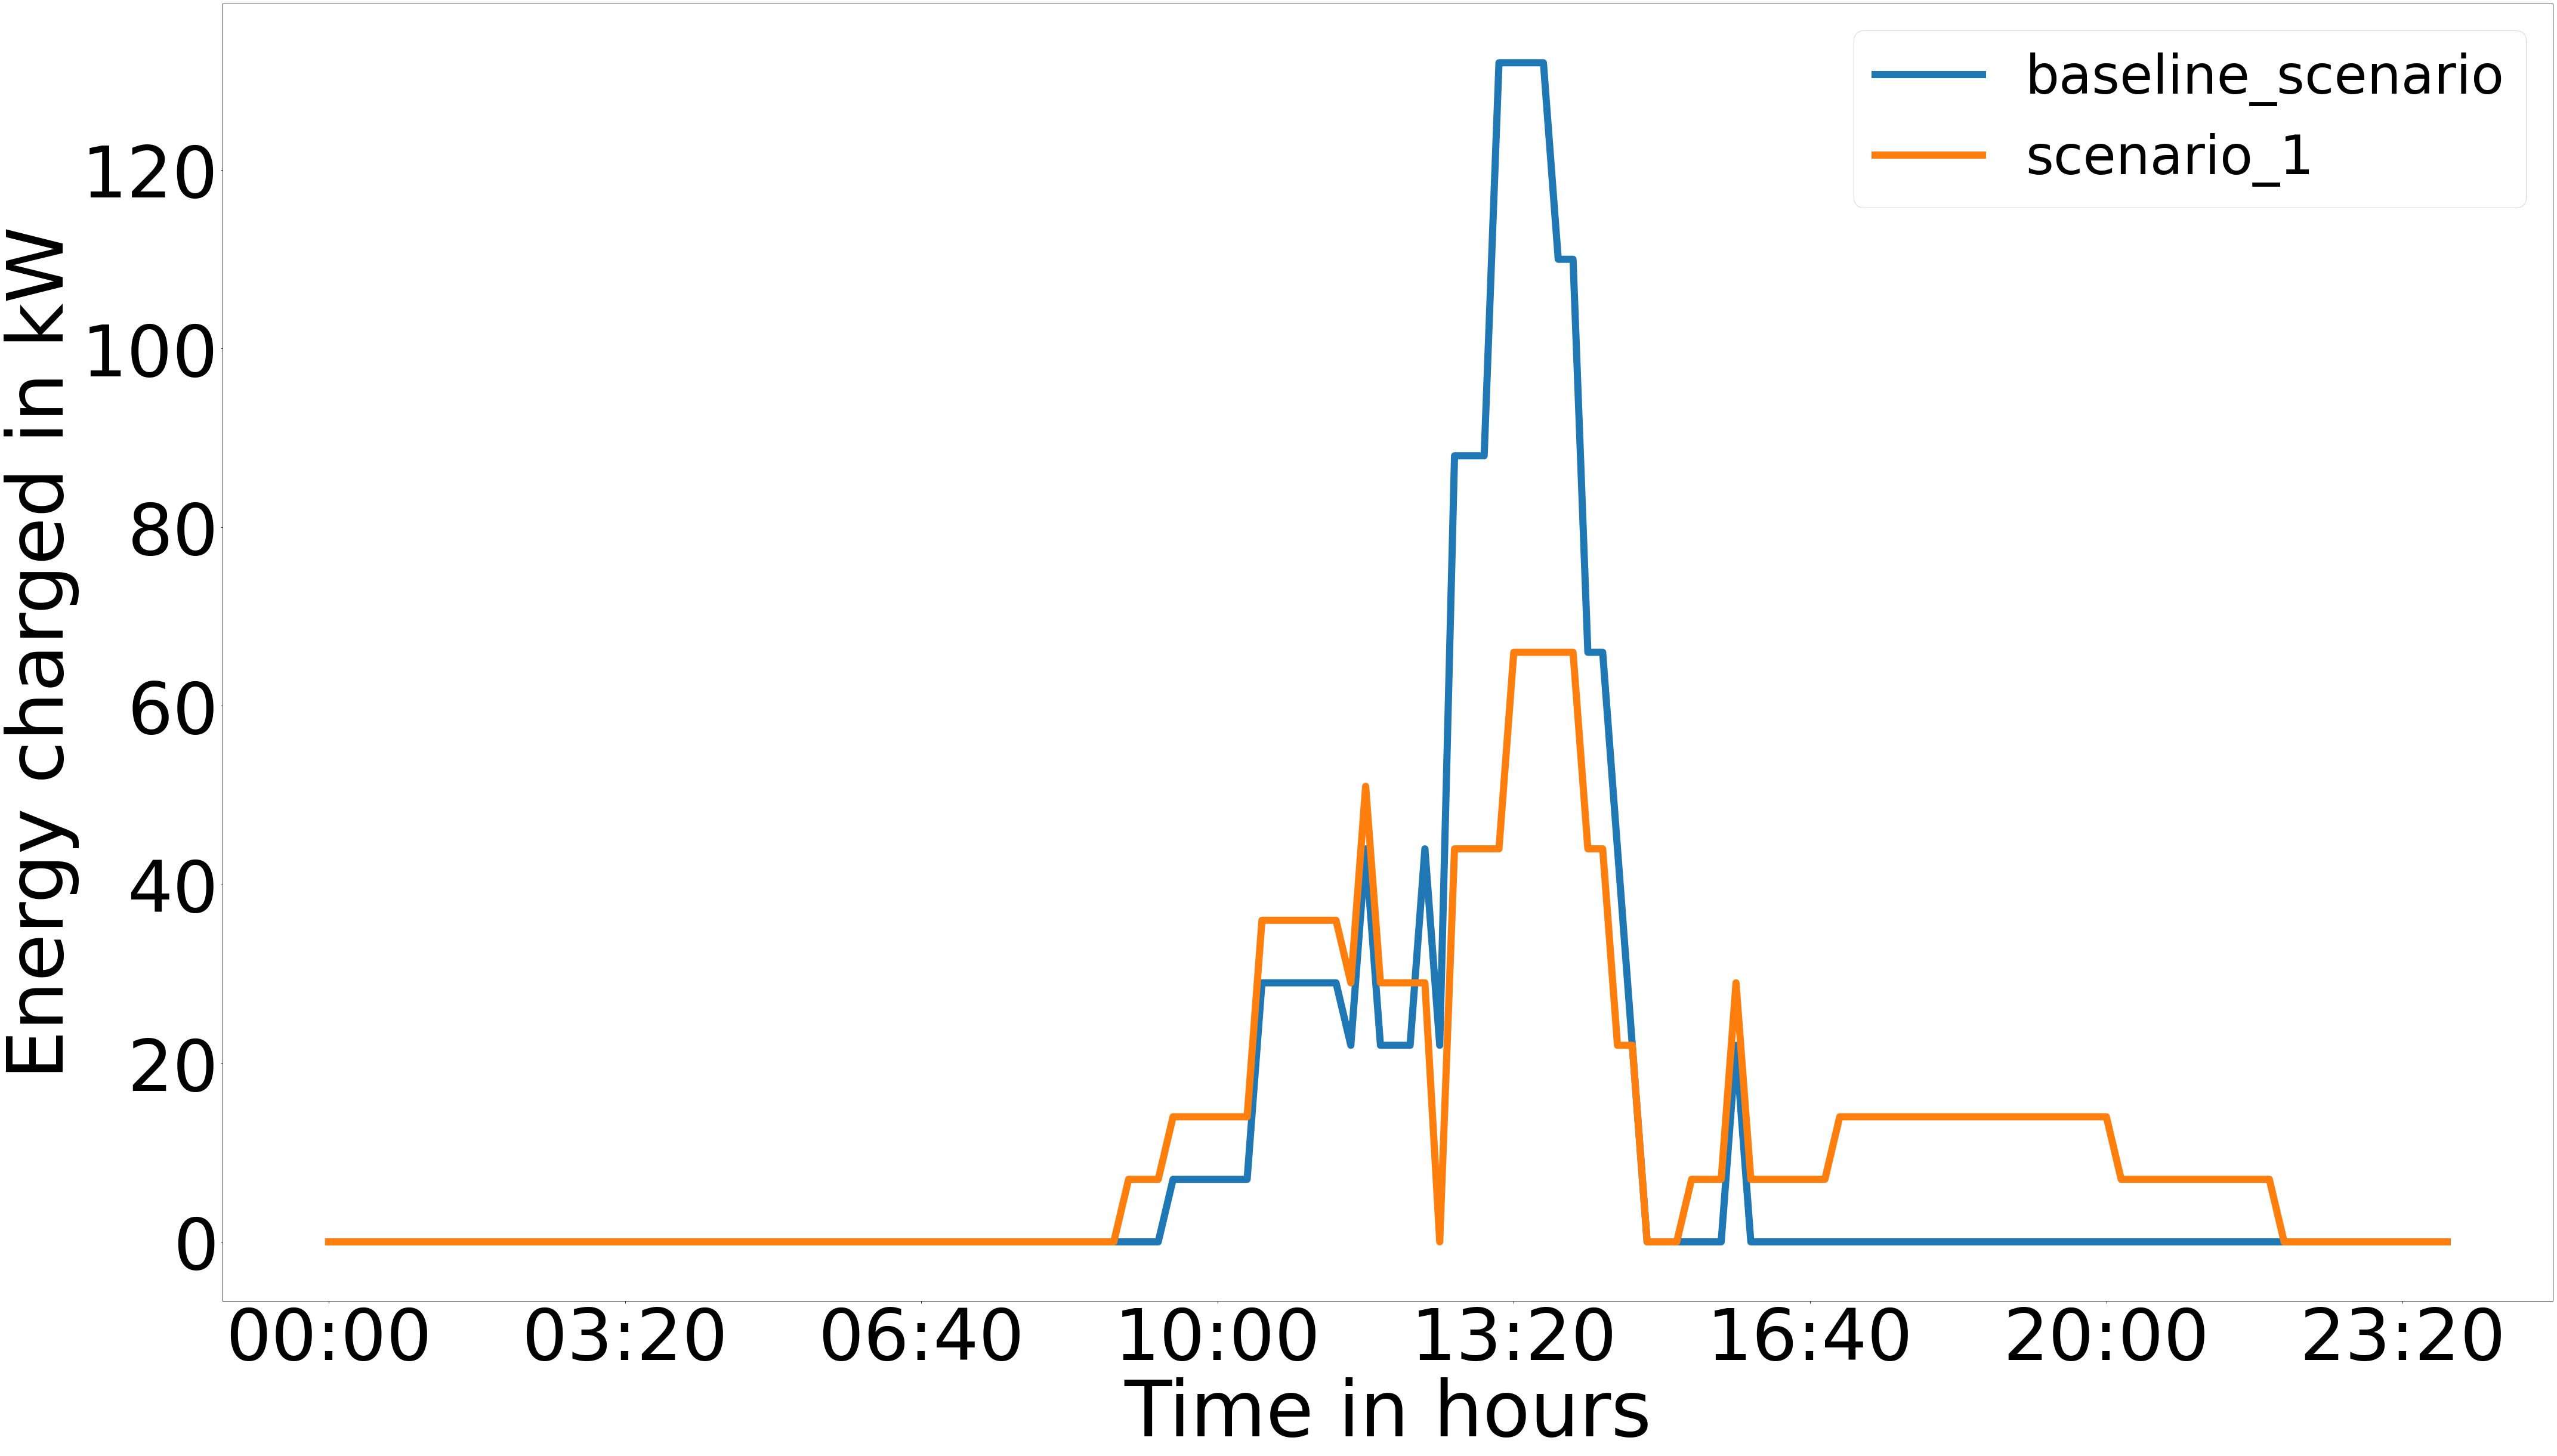

In [49]:
# Plot comparison of power profiles for transformer 2 and scenario 1
df_total.plot( kind = 'line', lw = 12, figsize=(70,40), fontsize=120, style='o-')
plt.legend(fontsize=90)
plt.xlabel('Time in hours', fontsize=130)
plt.ylabel('Energy charged in kW', fontsize=130)
plt.show()

## Scenario 2 power profiles of transformer 2 

In [50]:
df_output = pd.read_csv('charging_scenario2_new.csv', delimiter=";")
df_output

C:\Users\joey_\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,step,charging_station,status,ev,watt_charged,current_battery,maximum_battery
0,0,hh1_ev1_homecs,not charging,NaN,NaN,NaN,NaN
1,0,hh1_ev3_homecs,not charging,NaN,NaN,NaN,NaN
2,0,hh1_ev4_homecs,not charging,NaN,NaN,NaN,NaN
3,0,hh1_ev5_homecs,not charging,NaN,NaN,NaN,NaN
4,0,hh1_ev7_homecs,not charging,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
158748,86400,hh16_ev132_public,not charging,NaN,NaN,NaN,NaN
158749,86400,hh16_ev133_public,not charging,NaN,NaN,NaN,NaN
158750,86400,hh16_ev134_public,not charging,NaN,NaN,NaN,NaN
158751,86400,hh16_ev135_public,not charging,NaN,NaN,NaN,NaN


In [51]:
df_1 = df_output
df_1 = df_1[df_1['charging_station'] == "hh9_ev10_public"]
df_1 = df_1.drop(df_1.columns[[1, 3,4,5,6]], axis=1)
df_1['status'] = df_1['status'].str.replace('not charging','0')
df_1['status'] = df_1['status'].str.replace('charging','1')
df_1["status"] = pd.to_numeric(df_1["status"])
df_1['charging'] = df_1['status'] * 22
df_1 = df_1.drop(df_1.columns[[1]], axis=1)
df_1["step"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10","15:20","15:30","15:40","15:50","16:00","16:10","16:20","16:30","16:40","16:50","17:00","17:10","17:20","17:30","17:40","17:50","18:00","18:10","18:20","18:30","18:40","18:50","19:00","19:10","19:20","19:30","19:40","19:50","20:00","20:10","20:20","20:30","20:40","20:50","21:00","21:10","21:20","21:30","21:40","21:50","22:00","22:10","22:20","22:30","22:40","22:50","23:00","23:10","23:20","23:30","23:40","23:50","00:00","00:10","00:20","00:30","00:40","00:50","01:00","01:10","01:20","01:30","01:40","01:50","02:00","02:10","02:20","02:30","02:40","02:50","03:00","03:10","03:20","03:30","03:40","03:50","04:00","04:10","04:20","04:30","04:40","04:50","05:00","05:10","05:20","05:30","05:40","05:50","06:00"]
df_1

ValueError: Length of values does not match length of index

In [52]:
df_2 = df_output
df_2 = df_2[df_2['charging_station'] == "hh8_ev30_public"]
df_2 = df_2.drop(df_2.columns[[1, 3,4,5,6]], axis=1)
df_2['status'] = df_2['status'].str.replace('not charging','0')
df_2['status'] = df_2['status'].str.replace('charging','1')
df_2["status"] = pd.to_numeric(df_2["status"])
df_2['charging'] = df_2['status'] * 22
df_2["step"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10","15:20","15:30","15:40","15:50","16:00","16:10","16:20","16:30","16:40","16:50","17:00","17:10","17:20","17:30","17:40","17:50","18:00","18:10","18:20","18:30","18:40","18:50","19:00","19:10","19:20","19:30","19:40","19:50","20:00","20:10","20:20","20:30","20:40","20:50","21:00","21:10","21:20","21:30","21:40","21:50","22:00","22:10","22:20","22:30","22:40","22:50","23:00","23:10","23:20","23:30","23:40","23:50","00:00","00:10","00:20","00:30","00:40","00:50","01:00","01:10","01:20","01:30","01:40","01:50","02:00","02:10","02:20","02:30","02:40","02:50","03:00","03:10","03:20","03:30","03:40","03:50","04:00","04:10","04:20","04:30","04:40","04:50","05:00","05:10","05:20","05:30","05:40","05:50","06:00"]
df_2 = df_2.drop(df_2.columns[[1]], axis=1)

ValueError: Length of values does not match length of index

In [53]:
df_3 = df_output
df_3 = df_3[df_3['charging_station'] == "hh8_ev30_work"]
df_3 = df_3.drop(df_3.columns[[1, 3,4,5,6]], axis=1)
df_3['status'] = df_3['status'].str.replace('not charging','0')
df_3['status'] = df_3['status'].str.replace('charging','1')
df_3["status"] = pd.to_numeric(df_3["status"])
df_3['charging'] = df_3['status'] * 7
df_3["step"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10","15:20","15:30","15:40","15:50","16:00","16:10","16:20","16:30","16:40","16:50","17:00","17:10","17:20","17:30","17:40","17:50","18:00","18:10","18:20","18:30","18:40","18:50","19:00","19:10","19:20","19:30","19:40","19:50","20:00","20:10","20:20","20:30","20:40","20:50","21:00","21:10","21:20","21:30","21:40","21:50","22:00","22:10","22:20","22:30","22:40","22:50","23:00","23:10","23:20","23:30","23:40","23:50","00:00","00:10","00:20","00:30","00:40","00:50","01:00","01:10","01:20","01:30","01:40","01:50","02:00","02:10","02:20","02:30","02:40","02:50","03:00","03:10","03:20","03:30","03:40","03:50","04:00","04:10","04:20","04:30","04:40","04:50","05:00","05:10","05:20","05:30","05:40","05:50","06:00"]
df_3 = df_3.drop(df_3.columns[[1]], axis=1)

ValueError: Length of values does not match length of index

In [54]:
df_4 = df_output
df_4 = df_4[df_4['charging_station'] == "hh11_ev20_public"]
df_4 = df_4.drop(df_4.columns[[1, 3,4,5,6]], axis=1)
df_4['status'] = df_4['status'].str.replace('not charging','0')
df_4['status'] = df_4['status'].str.replace('charging','1')
df_4["status"] = pd.to_numeric(df_4["status"])
df_4['charging'] = df_4['status'] * 22
df_4["step"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10","15:20","15:30","15:40","15:50","16:00","16:10","16:20","16:30","16:40","16:50","17:00","17:10","17:20","17:30","17:40","17:50","18:00","18:10","18:20","18:30","18:40","18:50","19:00","19:10","19:20","19:30","19:40","19:50","20:00","20:10","20:20","20:30","20:40","20:50","21:00","21:10","21:20","21:30","21:40","21:50","22:00","22:10","22:20","22:30","22:40","22:50","23:00","23:10","23:20","23:30","23:40","23:50","00:00","00:10","00:20","00:30","00:40","00:50","01:00","01:10","01:20","01:30","01:40","01:50","02:00","02:10","02:20","02:30","02:40","02:50","03:00","03:10","03:20","03:30","03:40","03:50","04:00","04:10","04:20","04:30","04:40","04:50","05:00","05:10","05:20","05:30","05:40","05:50","06:00"]
df_4 = df_4.drop(df_4.columns[[1]], axis=1)

ValueError: Length of values does not match length of index

In [55]:
df_5 = df_output
df_5 = df_5[df_5['charging_station'] == "hh16_ev101_work"]
df_5 = df_5.drop(df_5.columns[[1, 3,4,5,6]], axis=1)
df_5['status'] = df_5['status'].str.replace('not charging','0')
df_5['status'] = df_5['status'].str.replace('charging','1')
df_5["status"] = pd.to_numeric(df_5["status"])
df_5['charging'] = df_5['status'] * 7
df_5["step"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10","15:20","15:30","15:40","15:50","16:00","16:10","16:20","16:30","16:40","16:50","17:00","17:10","17:20","17:30","17:40","17:50","18:00","18:10","18:20","18:30","18:40","18:50","19:00","19:10","19:20","19:30","19:40","19:50","20:00","20:10","20:20","20:30","20:40","20:50","21:00","21:10","21:20","21:30","21:40","21:50","22:00","22:10","22:20","22:30","22:40","22:50","23:00","23:10","23:20","23:30","23:40","23:50","00:00","00:10","00:20","00:30","00:40","00:50","01:00","01:10","01:20","01:30","01:40","01:50","02:00","02:10","02:20","02:30","02:40","02:50","03:00","03:10","03:20","03:30","03:40","03:50","04:00","04:10","04:20","04:30","04:40","04:50","05:00","05:10","05:20","05:30","05:40","05:50","06:00"]
df_5 = df_5.drop(df_5.columns[[1]], axis=1)

ValueError: Length of values does not match length of index

In [ ]:
df_6 = df_output
df_6 = df_6[df_6['charging_station'] == "hh3_ev11_public"]
df_6 = df_6.drop(df_6.columns[[1, 3,4,5,6]], axis=1)
df_6['status'] = df_6['status'].str.replace('not charging','0')
df_6['status'] = df_6['status'].str.replace('charging','1')
df_6["status"] = pd.to_numeric(df_6["status"])
df_6['charging'] = df_6['status'] * 22
df_6["step"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10","15:20","15:30","15:40","15:50","16:00","16:10","16:20","16:30","16:40","16:50","17:00","17:10","17:20","17:30","17:40","17:50","18:00","18:10","18:20","18:30","18:40","18:50","19:00","19:10","19:20","19:30","19:40","19:50","20:00","20:10","20:20","20:30","20:40","20:50","21:00","21:10","21:20","21:30","21:40","21:50","22:00","22:10","22:20","22:30","22:40","22:50","23:00","23:10","23:20","23:30","23:40","23:50","00:00","00:10","00:20","00:30","00:40","00:50","01:00","01:10","01:20","01:30","01:40","01:50","02:00","02:10","02:20","02:30","02:40","02:50","03:00","03:10","03:20","03:30","03:40","03:50","04:00","04:10","04:20","04:30","04:40","04:50","05:00","05:10","05:20","05:30","05:40","05:50","06:00"]
df_6 = df_6.drop(df_6.columns[[1]], axis=1)

In [56]:
df_7 = df_output
df_7 = df_7[df_7['charging_station'] == "hh2_ev20_homecs"]
df_7 = df_7.drop(df_7.columns[[1, 3,4,5,6]], axis=1)
df_7['status'] = df_7['status'].str.replace('not charging','0')
df_7['status'] = df_7['status'].str.replace('charging','1')
df_7["status"] = pd.to_numeric(df_7["status"])
df_7['charging'] = df_7['status'] * 7
df_7["step"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10","15:20","15:30","15:40","15:50","16:00","16:10","16:20","16:30","16:40","16:50","17:00","17:10","17:20","17:30","17:40","17:50","18:00","18:10","18:20","18:30","18:40","18:50","19:00","19:10","19:20","19:30","19:40","19:50","20:00","20:10","20:20","20:30","20:40","20:50","21:00","21:10","21:20","21:30","21:40","21:50","22:00","22:10","22:20","22:30","22:40","22:50","23:00","23:10","23:20","23:30","23:40","23:50","00:00","00:10","00:20","00:30","00:40","00:50","01:00","01:10","01:20","01:30","01:40","01:50","02:00","02:10","02:20","02:30","02:40","02:50","03:00","03:10","03:20","03:30","03:40","03:50","04:00","04:10","04:20","04:30","04:40","04:50","05:00","05:10","05:20","05:30","05:40","05:50","06:00"]
df_7 = df_7.drop(df_7.columns[[1]], axis=1)

ValueError: Length of values does not match length of index

In [57]:
df_8 = df_output
df_8 = df_8[df_8['charging_station'] == "hh15_ev2_public"]
df_8 = df_8.drop(df_8.columns[[1, 3,4,5,6]], axis=1)
df_8['status'] = df_8['status'].str.replace('not charging','0')
df_8['status'] = df_8['status'].str.replace('charging','1')
df_8["status"] = pd.to_numeric(df_8["status"])
df_8['charging'] = df_8['status'] * 22
df_8["step"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10","15:20","15:30","15:40","15:50","16:00","16:10","16:20","16:30","16:40","16:50","17:00","17:10","17:20","17:30","17:40","17:50","18:00","18:10","18:20","18:30","18:40","18:50","19:00","19:10","19:20","19:30","19:40","19:50","20:00","20:10","20:20","20:30","20:40","20:50","21:00","21:10","21:20","21:30","21:40","21:50","22:00","22:10","22:20","22:30","22:40","22:50","23:00","23:10","23:20","23:30","23:40","23:50","00:00","00:10","00:20","00:30","00:40","00:50","01:00","01:10","01:20","01:30","01:40","01:50","02:00","02:10","02:20","02:30","02:40","02:50","03:00","03:10","03:20","03:30","03:40","03:50","04:00","04:10","04:20","04:30","04:40","04:50","05:00","05:10","05:20","05:30","05:40","05:50","06:00"]
df_8 = df_8.drop(df_8.columns[[1]], axis=1)

ValueError: Length of values does not match length of index

In [58]:
df_9 = df_output
df_9 = df_9[df_9['charging_station'] == "hh2_ev20_public"]
df_9 = df_9.drop(df_9.columns[[1, 3,4,5,6]], axis=1)
df_9['status'] = df_9['status'].str.replace('not charging','0')
df_9['status'] = df_9['status'].str.replace('charging','1')
df_9["status"] = pd.to_numeric(df_9["status"])
df_9['charging'] = df_9['status'] * 22
df_9["step"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10","15:20","15:30","15:40","15:50","16:00","16:10","16:20","16:30","16:40","16:50","17:00","17:10","17:20","17:30","17:40","17:50","18:00","18:10","18:20","18:30","18:40","18:50","19:00","19:10","19:20","19:30","19:40","19:50","20:00","20:10","20:20","20:30","20:40","20:50","21:00","21:10","21:20","21:30","21:40","21:50","22:00","22:10","22:20","22:30","22:40","22:50","23:00","23:10","23:20","23:30","23:40","23:50","00:00","00:10","00:20","00:30","00:40","00:50","01:00","01:10","01:20","01:30","01:40","01:50","02:00","02:10","02:20","02:30","02:40","02:50","03:00","03:10","03:20","03:30","03:40","03:50","04:00","04:10","04:20","04:30","04:40","04:50","05:00","05:10","05:20","05:30","05:40","05:50","06:00"]
df_9 = df_9.drop(df_9.columns[[1]], axis=1)

In [59]:
df_10 = df_output
df_10 = df_10[df_10['charging_station'] == "hh3_ev60_public"]
df_10 = df_10.drop(df_10.columns[[1, 3,4,5,6]], axis=1)
df_10['status'] = df_10['status'].str.replace('not charging','0')
df_10['status'] = df_10['status'].str.replace('charging','1')
df_10["status"] = pd.to_numeric(df_10["status"])
df_10['charging'] = df_10['status'] * 22
df_10["step"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10","15:20","15:30","15:40","15:50","16:00","16:10","16:20","16:30","16:40","16:50","17:00","17:10","17:20","17:30","17:40","17:50","18:00","18:10","18:20","18:30","18:40","18:50","19:00","19:10","19:20","19:30","19:40","19:50","20:00","20:10","20:20","20:30","20:40","20:50","21:00","21:10","21:20","21:30","21:40","21:50","22:00","22:10","22:20","22:30","22:40","22:50","23:00","23:10","23:20","23:30","23:40","23:50","00:00","00:10","00:20","00:30","00:40","00:50","01:00","01:10","01:20","01:30","01:40","01:50","02:00","02:10","02:20","02:30","02:40","02:50","03:00","03:10","03:20","03:30","03:40","03:50","04:00","04:10","04:20","04:30","04:40","04:50","05:00","05:10","05:20","05:30","05:40","05:50","06:00"]
df_10 = df_10.drop(df_10.columns[[1]], axis=1)

ValueError: Length of values does not match length of index

In [60]:
df_11 = df_output
df_11 = df_11[df_11['charging_station'] == "hh1_ev10_public"]
df_11 = df_11.drop(df_11.columns[[1, 3,4,5,6]], axis=1)
df_11['status'] = df_11['status'].str.replace('not charging','0')
df_11['status'] = df_11['status'].str.replace('charging','1')
df_11["status"] = pd.to_numeric(df_11["status"])
df_11['charging'] = df_11['status'] * 22
df_11["step"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10","15:20","15:30","15:40","15:50","16:00","16:10","16:20","16:30","16:40","16:50","17:00","17:10","17:20","17:30","17:40","17:50","18:00","18:10","18:20","18:30","18:40","18:50","19:00","19:10","19:20","19:30","19:40","19:50","20:00","20:10","20:20","20:30","20:40","20:50","21:00","21:10","21:20","21:30","21:40","21:50","22:00","22:10","22:20","22:30","22:40","22:50","23:00","23:10","23:20","23:30","23:40","23:50","00:00","00:10","00:20","00:30","00:40","00:50","01:00","01:10","01:20","01:30","01:40","01:50","02:00","02:10","02:20","02:30","02:40","02:50","03:00","03:10","03:20","03:30","03:40","03:50","04:00","04:10","04:20","04:30","04:40","04:50","05:00","05:10","05:20","05:30","05:40","05:50","06:00"]
df_11 = df_11.drop(df_11.columns[[1]], axis=1)

ValueError: Length of values does not match length of index

In [61]:
df_12 = df_output
df_12 = df_12[df_12['charging_station'] == "hh16_ev119_public"]
df_12 = df_12.drop(df_12.columns[[1, 3,4,5,6]], axis=1)
df_12['status'] = df_12['status'].str.replace('not charging','0')
df_12['status'] = df_12['status'].str.replace('charging','1')
df_12["status"] = pd.to_numeric(df_12["status"])
df_12['charging'] = df_12['status'] * 22
df_12["step"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10","15:20","15:30","15:40","15:50","16:00","16:10","16:20","16:30","16:40","16:50","17:00","17:10","17:20","17:30","17:40","17:50","18:00","18:10","18:20","18:30","18:40","18:50","19:00","19:10","19:20","19:30","19:40","19:50","20:00","20:10","20:20","20:30","20:40","20:50","21:00","21:10","21:20","21:30","21:40","21:50","22:00","22:10","22:20","22:30","22:40","22:50","23:00","23:10","23:20","23:30","23:40","23:50","00:00","00:10","00:20","00:30","00:40","00:50","01:00","01:10","01:20","01:30","01:40","01:50","02:00","02:10","02:20","02:30","02:40","02:50","03:00","03:10","03:20","03:30","03:40","03:50","04:00","04:10","04:20","04:30","04:40","04:50","05:00","05:10","05:20","05:30","05:40","05:50","06:00"]
df_12 = df_12.drop(df_12.columns[[1]], axis=1)

ValueError: Length of values does not match length of index

In [62]:
df_13 = df_output
df_13 = df_13[df_13['charging_station'] == "hh1_ev16_homecs"]
df_13 = df_13.drop(df_13.columns[[1, 3,4,5,6]], axis=1)
df_13['status'] = df_13['status'].str.replace('not charging','0')
df_13['status'] = df_13['status'].str.replace('charging','1')
df_13["status"] = pd.to_numeric(df_13["status"])
df_13['charging'] = df_13['status'] * 7
df_13["step"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10","15:20","15:30","15:40","15:50","16:00","16:10","16:20","16:30","16:40","16:50","17:00","17:10","17:20","17:30","17:40","17:50","18:00","18:10","18:20","18:30","18:40","18:50","19:00","19:10","19:20","19:30","19:40","19:50","20:00","20:10","20:20","20:30","20:40","20:50","21:00","21:10","21:20","21:30","21:40","21:50","22:00","22:10","22:20","22:30","22:40","22:50","23:00","23:10","23:20","23:30","23:40","23:50","00:00","00:10","00:20","00:30","00:40","00:50","01:00","01:10","01:20","01:30","01:40","01:50","02:00","02:10","02:20","02:30","02:40","02:50","03:00","03:10","03:20","03:30","03:40","03:50","04:00","04:10","04:20","04:30","04:40","04:50","05:00","05:10","05:20","05:30","05:40","05:50","06:00"]
df_13 = df_13.drop(df_13.columns[[1]], axis=1)

In [63]:
# Combine power profiles of scenario 2 into transformer 2
df_all222 = pd.concat([ df_9, df_13]) 
df_all222 = df_all222.sort_values('step')
df_all222 = df_all222.groupby('step').sum()
df_all222

,charging
step,
00:00,0.0
00:10,0.0
00:20,0.0
00:30,0.0
00:40,0.0
...,...
23:10,0.0
23:20,0.0
23:30,0.0


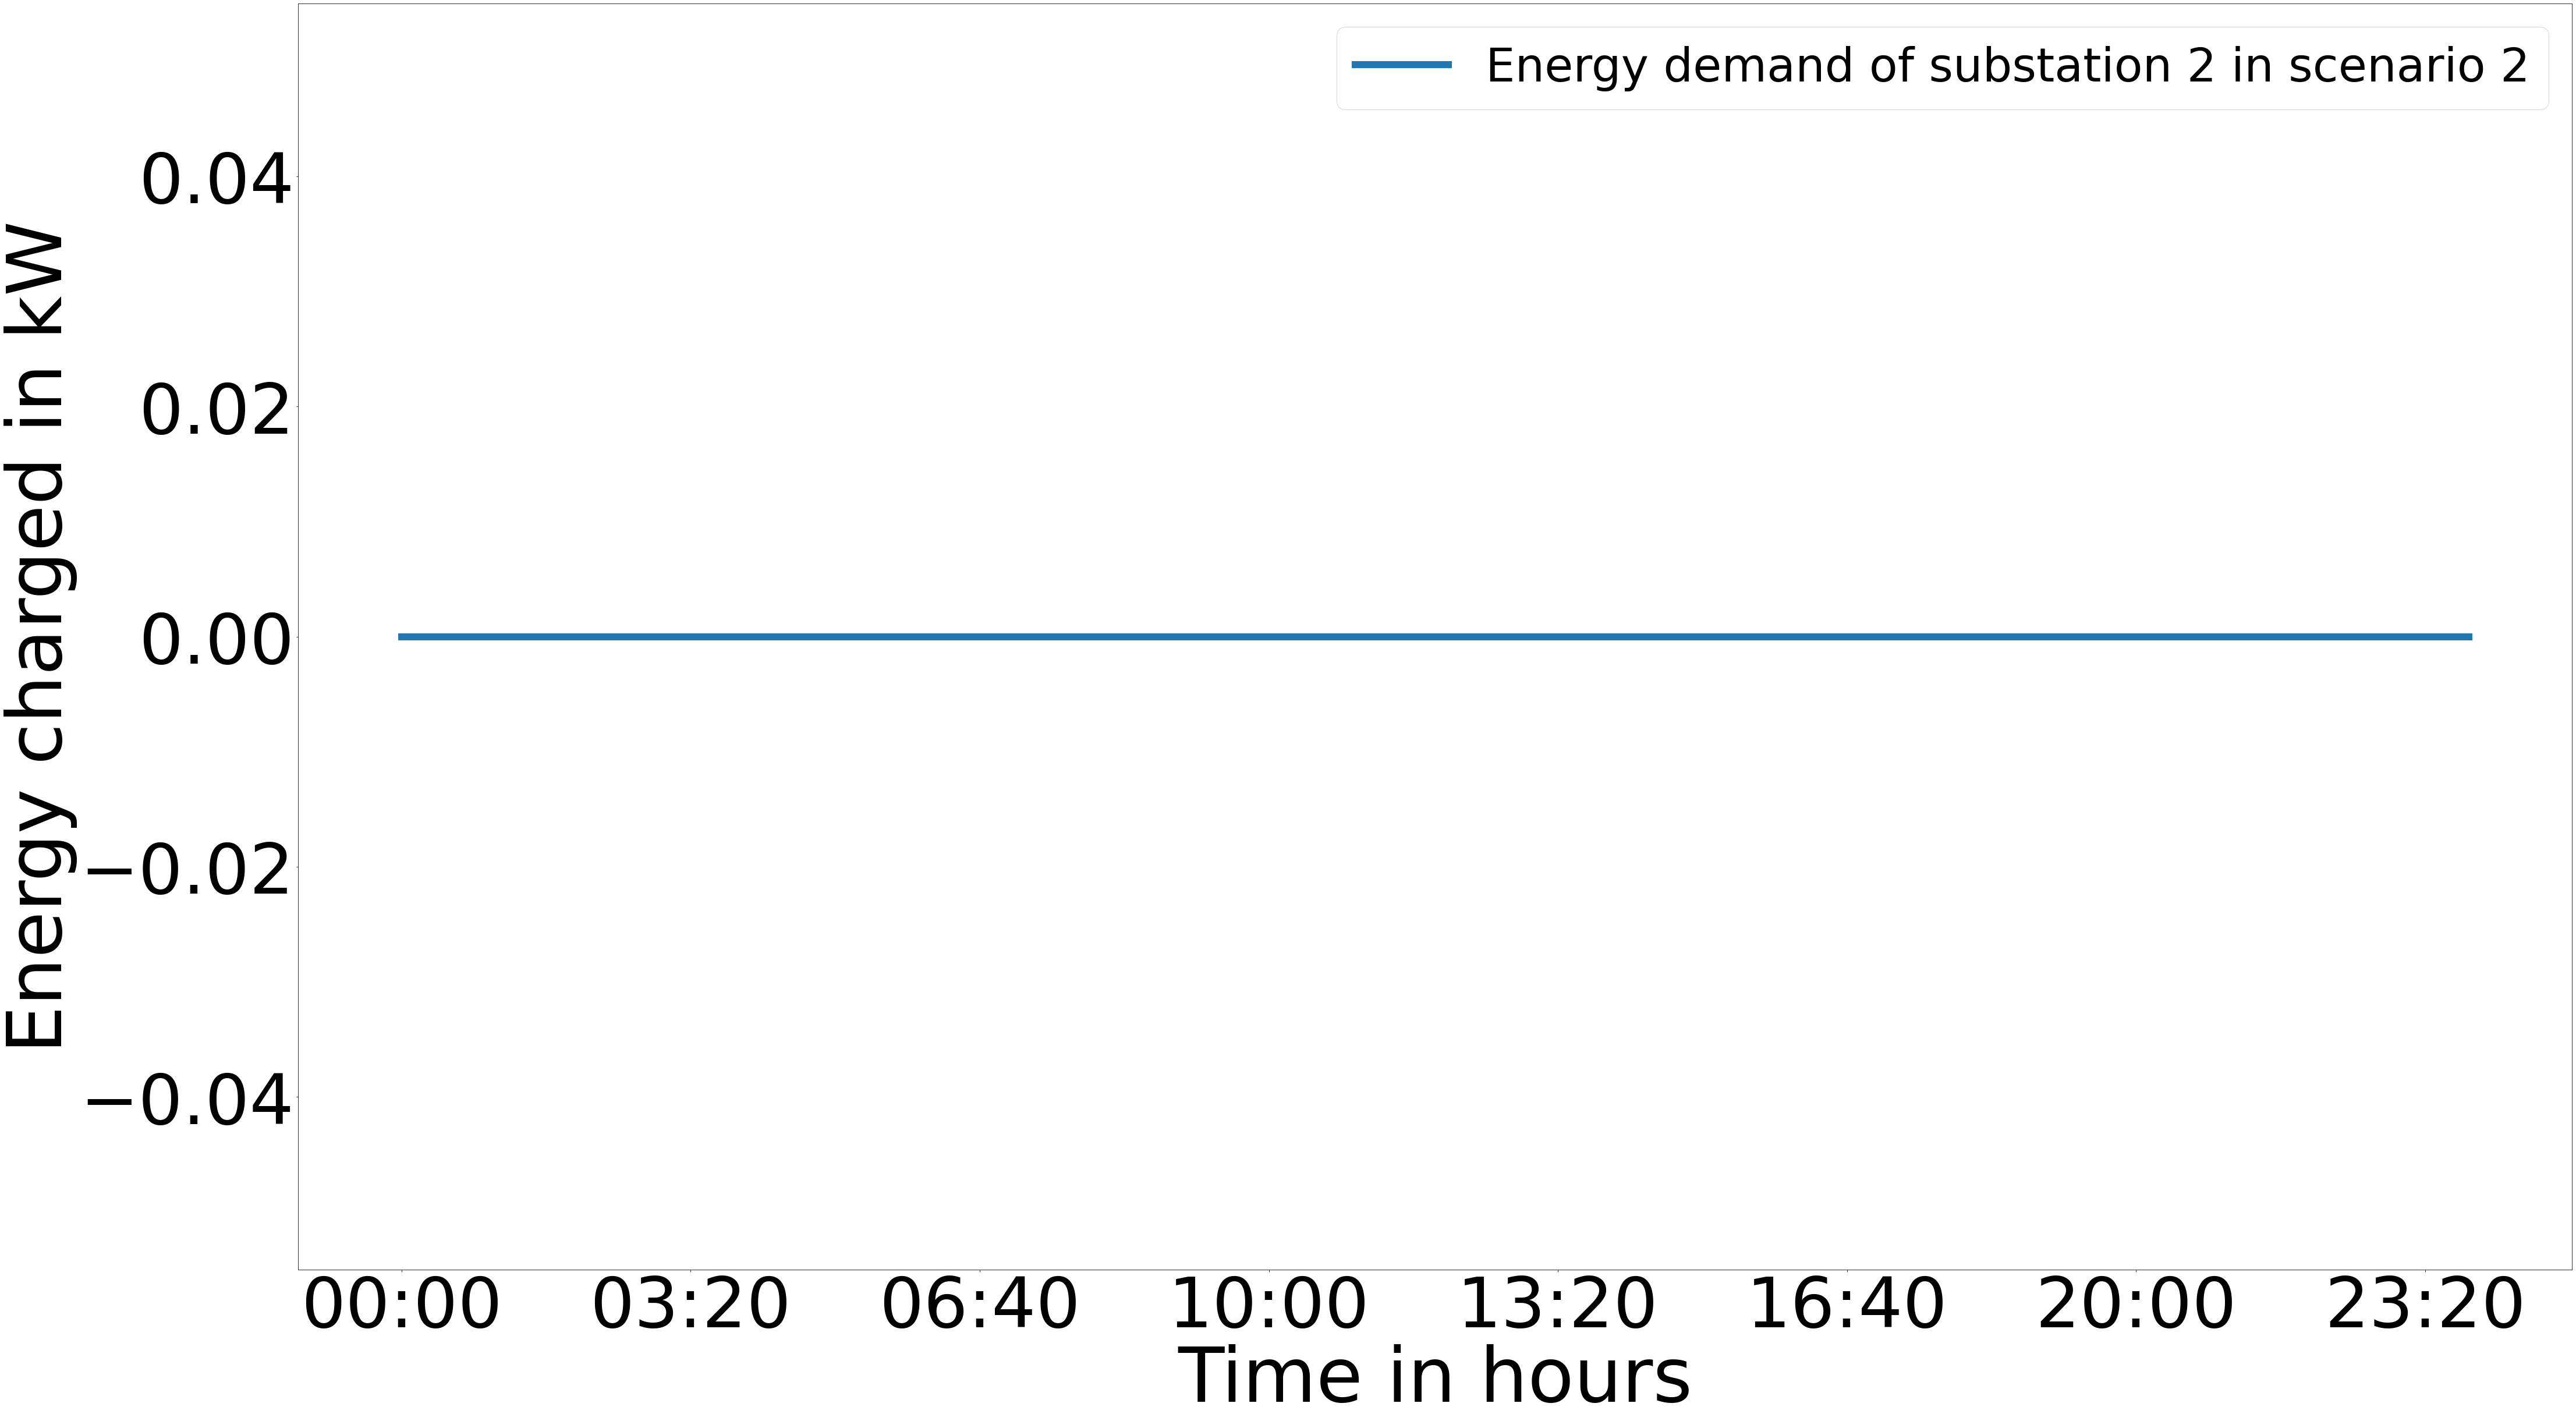

In [64]:
# Plot power profile of transformer 2 and scenario 2
df_all222.plot(y='charging', kind = 'line', lw = 12, figsize=(70,40), fontsize=120, style='o-')
plt.legend(['Energy demand of substation 2 in scenario 2'], fontsize=80)
plt.xlabel('Time in hours', fontsize=130)
plt.ylabel('Energy charged in kW', fontsize=130)
plt.show()

In [65]:
# Rename column
df_all222['scenario_2'] = df_all222['charging']

df_all222

,charging,scenario_2
step,,
00:00,0.0,0.0
00:10,0.0,0.0
00:20,0.0,0.0
00:30,0.0,0.0
00:40,0.0,0.0
...,...,...
23:10,0.0,0.0
23:20,0.0,0.0
23:30,0.0,0.0


In [66]:
# Drop column
df_all222 = df_all222.drop(df_all222.columns[[0]], axis=1)
df_all222

,scenario_2
step,
00:00,0.0
00:10,0.0
00:20,0.0
00:30,0.0
00:40,0.0
...,...
23:10,0.0
23:20,0.0
23:30,0.0


In [67]:
# Combine power profiles of transformer 2 for baseline scenario and scenario 2
df_total2 = pd.concat([ df_all2, df_all222]) 
df_total2 = df_total2.sort_values('step')
df_total2 = df_total2.groupby('step').sum()
df_total2

,baseline_scenario,scenario_2
step,,
00:00,0.0,0.0
00:10,0.0,0.0
00:20,0.0,0.0
00:30,0.0,0.0
00:40,0.0,0.0
...,...,...
23:10,0.0,0.0
23:20,0.0,0.0
23:30,0.0,0.0


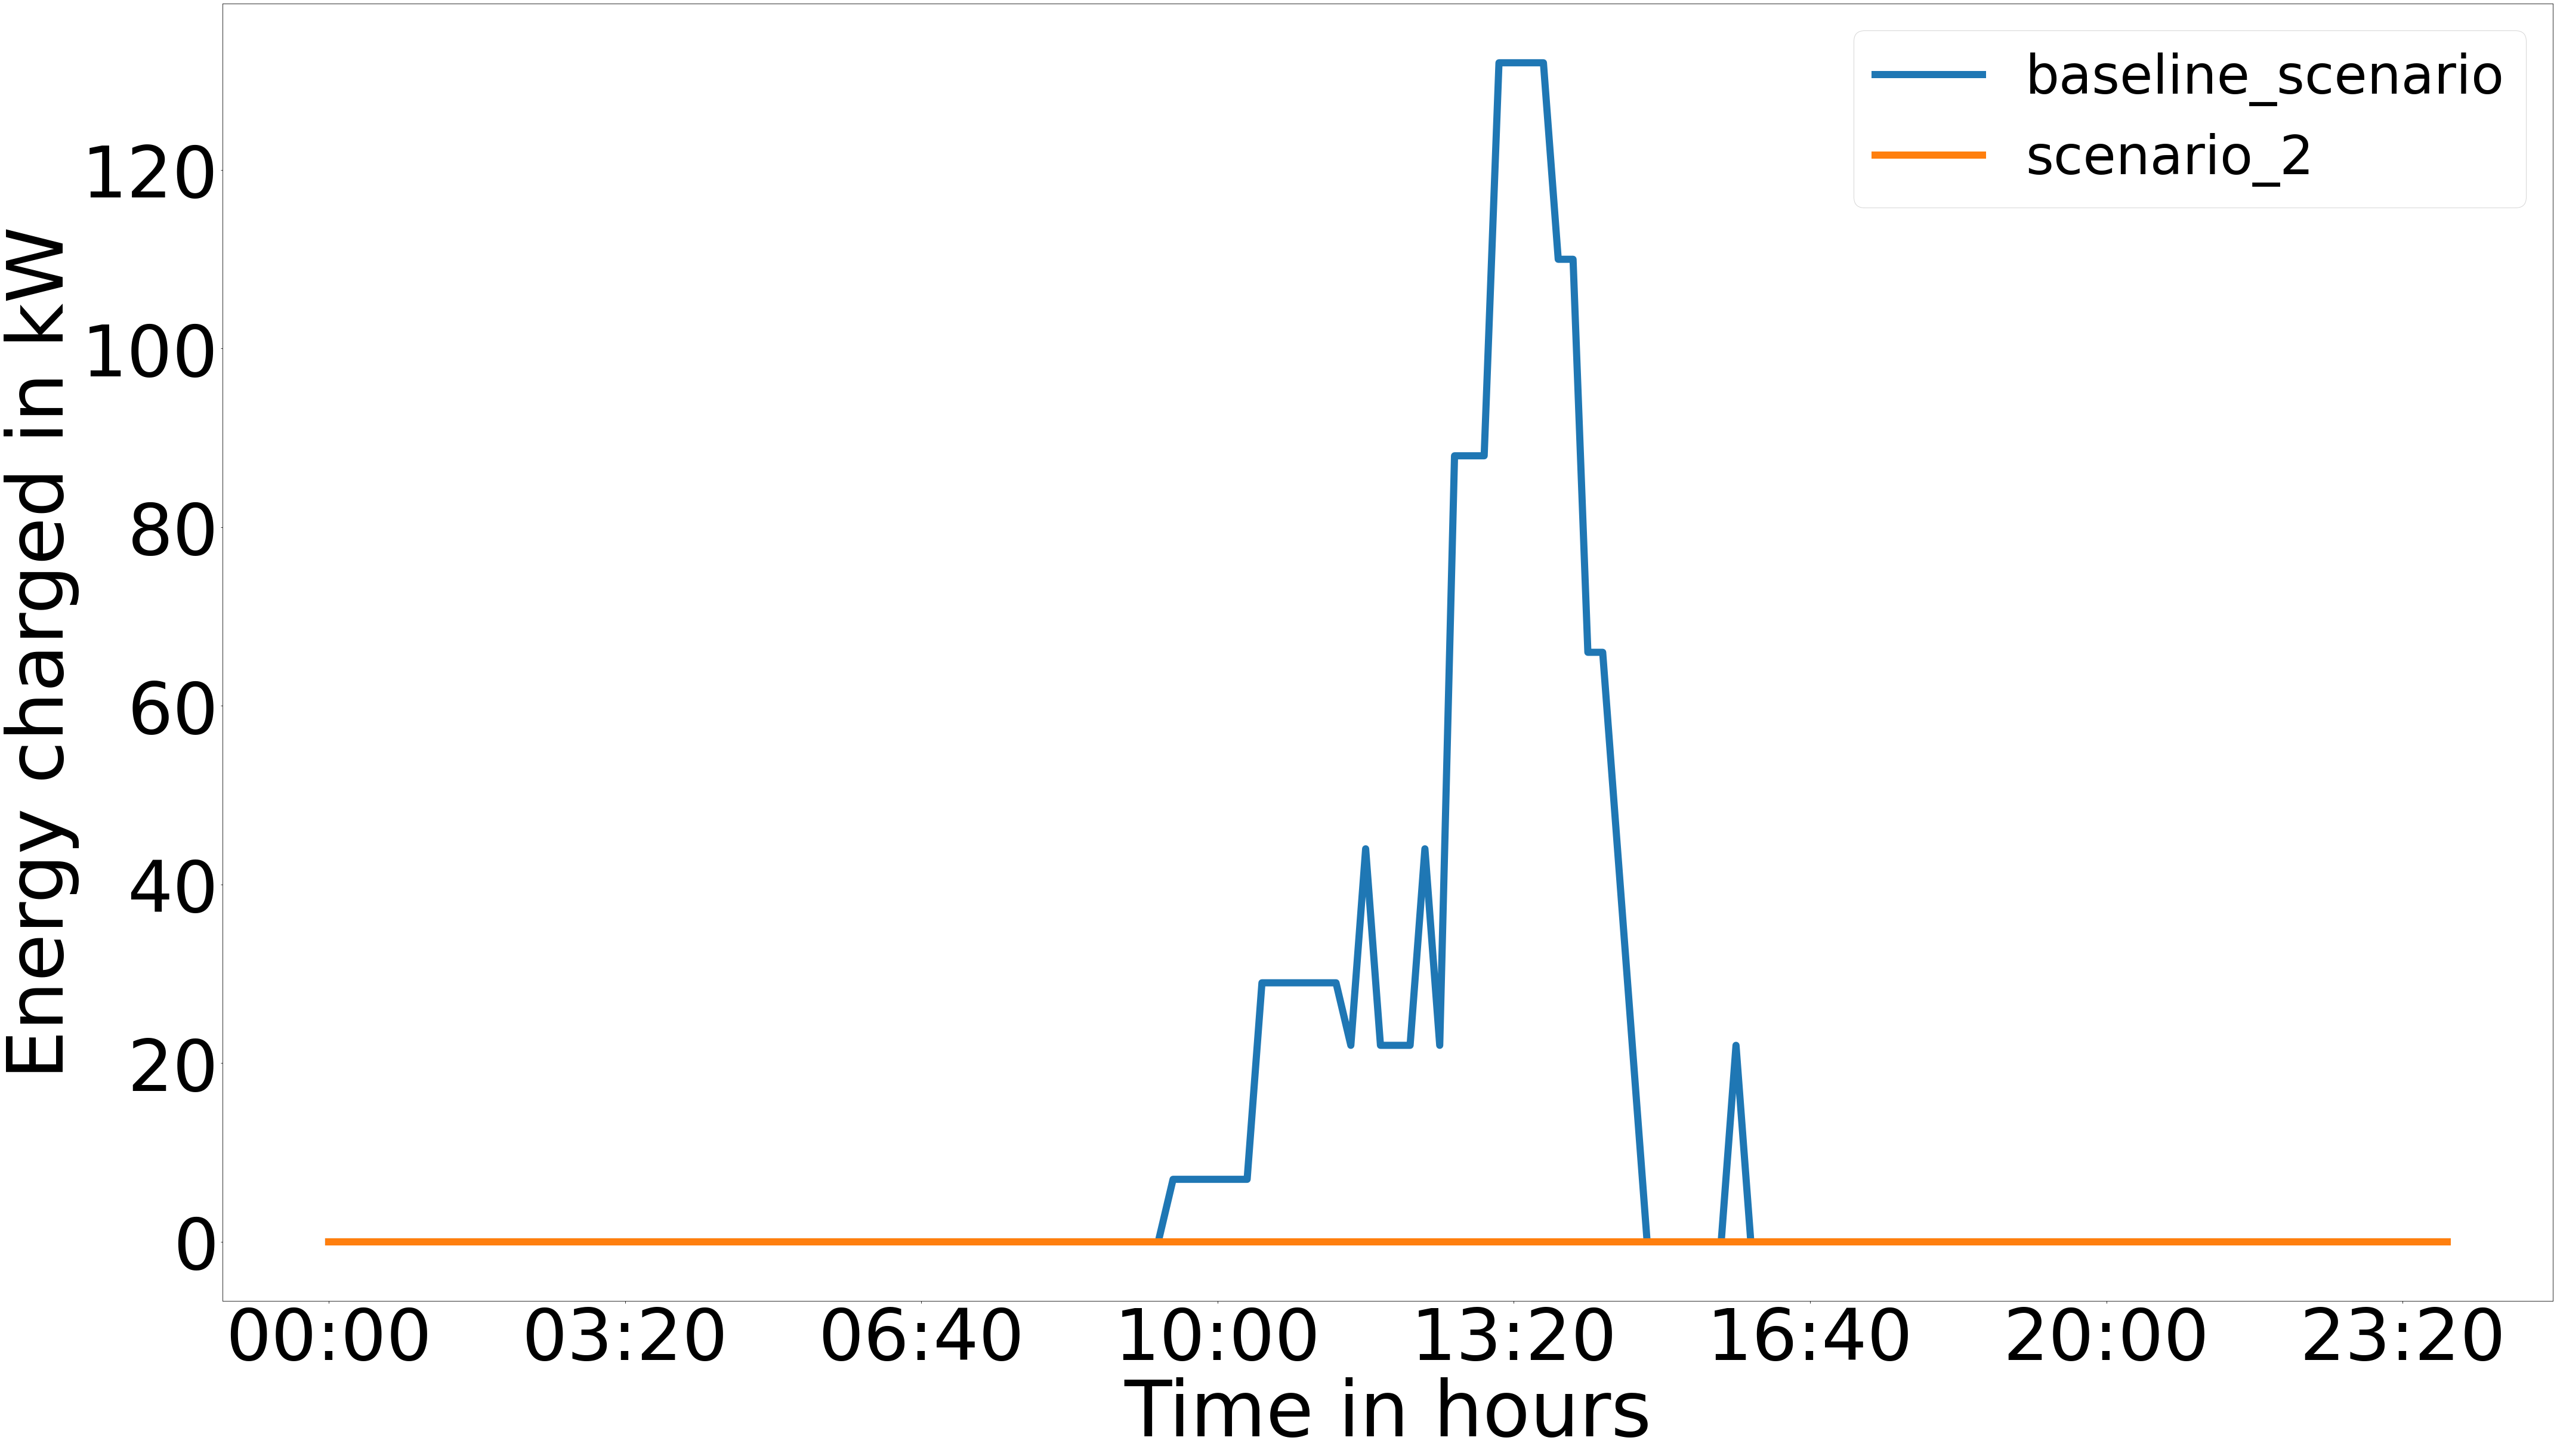

In [68]:
# Plot power profile of transformer 2 for scenario 2
df_total2.plot( kind = 'line', lw = 12, figsize=(70,40), fontsize=120, style='o-')
plt.legend(fontsize=90)
plt.xlabel('Time in hours', fontsize=130)
plt.ylabel('Energy charged in kW', fontsize=130)
plt.show()